# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read the Data (QI1 seen.xlsx)**

In [96]:
df = pd.read_excel('/content/drive/MyDrive/Mina /Data Science Technical Assessment/Q1 seen.xlsx')
df

,date,product_name,Composition,qty,sku
0,2024-12-30 19:41:45,LESCOL XL 80 MG 28 TAB,Fluvastatin 80 mg,1.0,Lescol XL 80mg Tablet 28
1,2024-12-30 19:41:45,OLEXA(5MG)(30 ODT),Olanzapine 5 mg,1.0,Olexa 5mg ODT 30
2,2024-12-30 19:41:45,EXOPEX (20 MG) (30 ODT),Escitalopram 20 mg,1.0,Exopex 20mg ODT 30
3,2024-12-30 19:41:45,EXOPEX (10 MG) (30 ODT),Escitalopram 10 mg,1.0,Exopex 10mg ODT 30
4,2024-12-30 19:41:45,EAZIT D.S (10 CAPS),Chlorpheniramine maleate 8 mg + Pseudoephedr...,1.0,Eazit D.S Capsule 10
...,...,...,...,...,...
68258,2023-12-31 05:08:37,AMOCLAN FORTE 625MG TAB,Amoxicillin 500 mg + Clavulanic Acid 125 mg,1.0,Amoclan Forte 625mg Tablet 15
68259,2023-12-31 05:08:37,TRIFED TAB 20,Dextromethorphan hbr 10 mg / 5 ml + Triprolidi...,1.0,Trifed Cold & Allergy Tablet 20
68260,2023-12-31 05:08:37,AVALON PRILA CREAM( 5%),Lidocaine 2.5 % + Prilocaine 2.5 %,1.0,Avalon Prila 5% Cream 5x5g
68261,2023-12-31 05:08:37,ASPIRIN PROTECT (100MG) (30TAB),Acetylsalicylic Acid 100 mg,15.0,Aspirin Protect 100mg EC Tablet 30


# **Data Understanding**

In [15]:
df.dtypes

,0
date,datetime64[ns]
product_name,object
Composition,object
qty,float64
sku,object


In [16]:
missing_table = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Total Rows': len(df),
    'Missing %': 100 * df.isnull().sum() / len(df)
})

print(missing_table)

              Missing Count  Total Rows  Missing %
date                      0       68263   0.000000
product_name              0       68263   0.000000
Composition           12677       68263  18.570822
qty                       0       68263   0.000000
sku                       0       68263   0.000000


In [17]:
missing_records = df[df.isnull().any(axis=1)]
missing_records

,date,product_name,Composition,qty,sku
14,2024-12-30 19:41:45,BABY LIFE 1 (21 DIAPER),NaN,1.0,Baby Life 1 Diaper 21
36,2024-12-30 14:50:48,BEBELAC (2) (900 GR),NaN,1.0,Bebelac 2 Milk 900g
37,2024-12-30 14:50:48,SIGNAL CAVITY FIGHTER 100ML T/P,NaN,1.0,Signal Cavity Fighter Herbal Extract Toothpast...
49,2024-12-30 14:18:26,SPANDEX CREPE BANDAGE 5*4.5,NaN,1.0,Spandex Crepe Bandage 5cmx4.5M
54,2024-12-30 13:41:01,ETHA 76% (250ML),NaN,2.0,Etha Alcohol 76% Spray 250ml
...,...,...,...,...,...
68224,2023-12-31 08:57:03,GLUCOLAB STRIP,NaN,1.0,Glucolab Blood Glucose Strip 50
68228,2023-12-31 08:13:24,GLUCOLAB STRIP,NaN,1.0,Glucolab Blood Glucose Strip 50
68236,2023-12-31 07:44:34,NANA MAXI EXTRA LONG NIGHT 7,NaN,1.0,Nana Maxi Good Night Wings Pad 7
68243,2023-12-31 06:13:23,JAMIESON COQ10 (120 MG) (30CAP),NaN,1.0,Jamieson Co-Q10 120mg Capsule 30


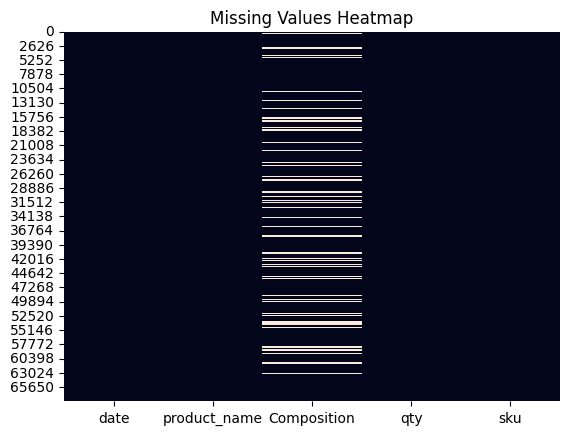

In [18]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# **Handel Missing**

In [ ]:

df['date'] = df['date'].astype(str).str.split(',').str[0]
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)
df['date'] = df['date'].dt.strftime('%Y-%m-%d')


df = df.rename(columns={
    'Composition': 'active_ingredient',
    'qty': 'quantity_sold'
})


def classify_non_drug(product_name):
    name = product_name.lower()
    if 'diaper' in name:
        return 'Diapers'
    elif 'toothpaste' in name or 't/p' in name or 'colgate' in name or 'signal' in name:
        return 'Toothpaste'
    elif 'bandage' in name or 'crepe' in name or 'gauze' in name:
        return 'Medical device'
    elif 'formula' in name or 'bebelac' in name or 'nan' in name or 's-26' in name:
        return 'Infant formula'
    elif 'shampoo' in name or 'lotion' in name or 'cream' in name:
        return 'Cosmetic / Shampoo'
    elif 'condom' in name or 'condos' in name:
        return 'Contraceptive device'
    elif 'alcohol' in name or 'etha' in name or 'antiseptic' in name:
        return 'Antiseptic / Alcohol'
    elif 'glucose' in name or 'dextrose' in name or 'vitamin' in name:
        return 'Nutritional product'
    else:
        return 'Other'



df['active_ingredient_filled'] = df.apply(
    lambda row: row['active_ingredient']
    if pd.notnull(row['active_ingredient'])
    else classify_non_drug(row['product_name']),
    axis=1
)


remaining_missing = df['active_ingredient_filled'].isnull().sum()
print(f"Remaining missing active_ingredient after segmentation: {remaining_missing}")


df.to_csv("Q1-seen-full-cleaned.csv", index=False)


df[['product_name', 'active_ingredient', 'active_ingredient_filled']].head(20)

Remaining missing active_ingredient after segmentation: 0


,product_name,active_ingredient,active_ingredient_filled
0,LESCOL XL 80 MG 28 TAB,Fluvastatin 80 mg,Fluvastatin 80 mg
1,OLEXA(5MG)(30 ODT),Olanzapine 5 mg,Olanzapine 5 mg
2,EXOPEX (20 MG) (30 ODT),Escitalopram 20 mg,Escitalopram 20 mg
3,EXOPEX (10 MG) (30 ODT),Escitalopram 10 mg,Escitalopram 10 mg
4,EAZIT D.S (10 CAPS),Chlorpheniramine maleate 8 mg + Pseudoephedr...,Chlorpheniramine maleate 8 mg + Pseudoephedr...
5,ZOMAX (500 MG) (3 TAB),Azithromycin 500 mg,Azithromycin 500 mg
6,FLUCAND 150MG (1 CAP),Fluconazole 150 mg,Fluconazole 150 mg
7,PERIACTIN 4MG TAB 20,Cyproheptadine 4 mg,Cyproheptadine 4 mg
8,LEXOPAM 6 MG TAB 30,Bromazepam 6 mg,Bromazepam 6 mg
9,PLAVIX 75MG,Clopidogrel 75 mg,Clopidogrel 75 mg


In [98]:
df

,date,product_name,active_ingredient,quantity_sold,sku,active_ingredient_filled
0,2024-12-30,LESCOL XL 80 MG 28 TAB,Fluvastatin 80 mg,1.0,Lescol XL 80mg Tablet 28,Fluvastatin 80 mg
1,2024-12-30,OLEXA(5MG)(30 ODT),Olanzapine 5 mg,1.0,Olexa 5mg ODT 30,Olanzapine 5 mg
2,2024-12-30,EXOPEX (20 MG) (30 ODT),Escitalopram 20 mg,1.0,Exopex 20mg ODT 30,Escitalopram 20 mg
3,2024-12-30,EXOPEX (10 MG) (30 ODT),Escitalopram 10 mg,1.0,Exopex 10mg ODT 30,Escitalopram 10 mg
4,2024-12-30,EAZIT D.S (10 CAPS),Chlorpheniramine maleate 8 mg + Pseudoephedr...,1.0,Eazit D.S Capsule 10,Chlorpheniramine maleate 8 mg + Pseudoephedr...
...,...,...,...,...,...,...
68258,2023-12-31,AMOCLAN FORTE 625MG TAB,Amoxicillin 500 mg + Clavulanic Acid 125 mg,1.0,Amoclan Forte 625mg Tablet 15,Amoxicillin 500 mg + Clavulanic Acid 125 mg
68259,2023-12-31,TRIFED TAB 20,Dextromethorphan hbr 10 mg / 5 ml + Triprolidi...,1.0,Trifed Cold & Allergy Tablet 20,Dextromethorphan hbr 10 mg / 5 ml + Triprolidi...
68260,2023-12-31,AVALON PRILA CREAM( 5%),Lidocaine 2.5 % + Prilocaine 2.5 %,1.0,Avalon Prila 5% Cream 5x5g,Lidocaine 2.5 % + Prilocaine 2.5 %
68261,2023-12-31,ASPIRIN PROTECT (100MG) (30TAB),Acetylsalicylic Acid 100 mg,15.0,Aspirin Protect 100mg EC Tablet 30,Acetylsalicylic Acid 100 mg


In [99]:
missing_table = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Total Rows': len(df),
    'Missing %': 100 * df.isnull().sum() / len(df)
})

print(missing_table)

                          Missing Count  Total Rows  Missing %
date                                  0       68263   0.000000
product_name                          0       68263   0.000000
active_ingredient                 12677       68263  18.570822
quantity_sold                         0       68263   0.000000
sku                                   0       68263   0.000000
active_ingredient_filled              0       68263   0.000000


In [100]:
df = df.drop("active_ingredient", axis=1)
df

,date,product_name,quantity_sold,sku,active_ingredient_filled
0,2024-12-30,LESCOL XL 80 MG 28 TAB,1.0,Lescol XL 80mg Tablet 28,Fluvastatin 80 mg
1,2024-12-30,OLEXA(5MG)(30 ODT),1.0,Olexa 5mg ODT 30,Olanzapine 5 mg
2,2024-12-30,EXOPEX (20 MG) (30 ODT),1.0,Exopex 20mg ODT 30,Escitalopram 20 mg
3,2024-12-30,EXOPEX (10 MG) (30 ODT),1.0,Exopex 10mg ODT 30,Escitalopram 10 mg
4,2024-12-30,EAZIT D.S (10 CAPS),1.0,Eazit D.S Capsule 10,Chlorpheniramine maleate 8 mg + Pseudoephedr...
...,...,...,...,...,...
68258,2023-12-31,AMOCLAN FORTE 625MG TAB,1.0,Amoclan Forte 625mg Tablet 15,Amoxicillin 500 mg + Clavulanic Acid 125 mg
68259,2023-12-31,TRIFED TAB 20,1.0,Trifed Cold & Allergy Tablet 20,Dextromethorphan hbr 10 mg / 5 ml + Triprolidi...
68260,2023-12-31,AVALON PRILA CREAM( 5%),1.0,Avalon Prila 5% Cream 5x5g,Lidocaine 2.5 % + Prilocaine 2.5 %
68261,2023-12-31,ASPIRIN PROTECT (100MG) (30TAB),15.0,Aspirin Protect 100mg EC Tablet 30,Acetylsalicylic Acid 100 mg


# **EDA BEFORE GROUPING**



# 1.   FEATURES



In [102]:
df['date'] = pd.to_datetime(df['date'])

In [103]:
df['is_return'] = df['quantity_sold'] < 0
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['year'] = df['date'].dt.year

In [104]:
df

,date,product_name,quantity_sold,sku,active_ingredient_filled,is_return,month,day_of_week,year
0,2024-12-30,LESCOL XL 80 MG 28 TAB,1.0,Lescol XL 80mg Tablet 28,Fluvastatin 80 mg,False,12,0,2024
1,2024-12-30,OLEXA(5MG)(30 ODT),1.0,Olexa 5mg ODT 30,Olanzapine 5 mg,False,12,0,2024
2,2024-12-30,EXOPEX (20 MG) (30 ODT),1.0,Exopex 20mg ODT 30,Escitalopram 20 mg,False,12,0,2024
3,2024-12-30,EXOPEX (10 MG) (30 ODT),1.0,Exopex 10mg ODT 30,Escitalopram 10 mg,False,12,0,2024
4,2024-12-30,EAZIT D.S (10 CAPS),1.0,Eazit D.S Capsule 10,Chlorpheniramine maleate 8 mg + Pseudoephedr...,False,12,0,2024
...,...,...,...,...,...,...,...,...,...
68258,2023-12-31,AMOCLAN FORTE 625MG TAB,1.0,Amoclan Forte 625mg Tablet 15,Amoxicillin 500 mg + Clavulanic Acid 125 mg,False,12,6,2023
68259,2023-12-31,TRIFED TAB 20,1.0,Trifed Cold & Allergy Tablet 20,Dextromethorphan hbr 10 mg / 5 ml + Triprolidi...,False,12,6,2023
68260,2023-12-31,AVALON PRILA CREAM( 5%),1.0,Avalon Prila 5% Cream 5x5g,Lidocaine 2.5 % + Prilocaine 2.5 %,False,12,6,2023
68261,2023-12-31,ASPIRIN PROTECT (100MG) (30TAB),15.0,Aspirin Protect 100mg EC Tablet 30,Acetylsalicylic Acid 100 mg,False,12,6,2023


# 2.   BASIC DATA HEALTH

In [105]:
print("Basic Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nQuantity Sold Stats:")
print(df['quantity_sold'].describe())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68263 entries, 0 to 68262
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      68263 non-null  datetime64[ns]
 1   product_name              68263 non-null  object        
 2   quantity_sold             68263 non-null  float64       
 3   sku                       68263 non-null  object        
 4   active_ingredient_filled  68263 non-null  object        
 5   is_return                 68263 non-null  bool          
 6   month                     68263 non-null  int32         
 7   day_of_week               68263 non-null  int32         
 8   year                      68263 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(3), object(3)
memory usage: 3.5+ MB
None

Missing Values:
date                        0
product_name                0
quantity_sold             

# 3.   TOTAL SALES VS RETURNS

In [106]:
total_sales = df[df['quantity_sold'] > 0]['quantity_sold'].sum()
total_returns = df[df['quantity_sold'] < 0]['quantity_sold'].sum()
return_rate = abs(total_returns) / total_sales

print(f"\nTotal Sales: {total_sales}")
print(f"Total Returns: {total_returns}")
print(f"Return Rate: {return_rate:.2%}")


Total Sales: 85887.80799999999
Total Returns: -662.0
Return Rate: 0.77%





# 4.   TEMPORAL EDA





*   DAILY TREND



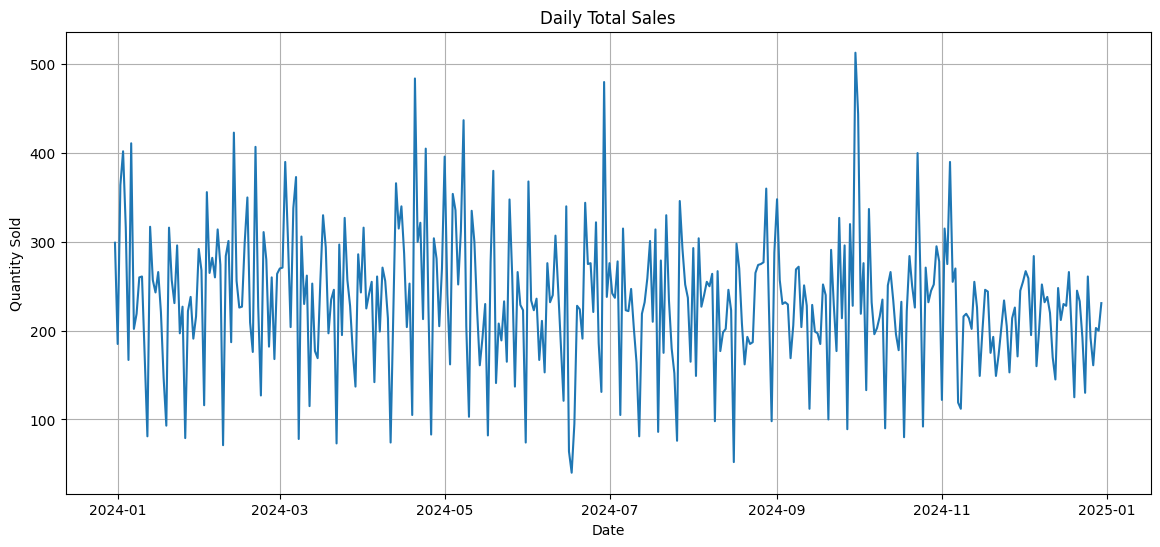

In [107]:
daily_trend = df.groupby('date')['quantity_sold'].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(daily_trend['date'], daily_trend['quantity_sold'])
plt.title("Daily Total Sales")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.grid()
plt.show()



*    WEEKDAY EFFECT




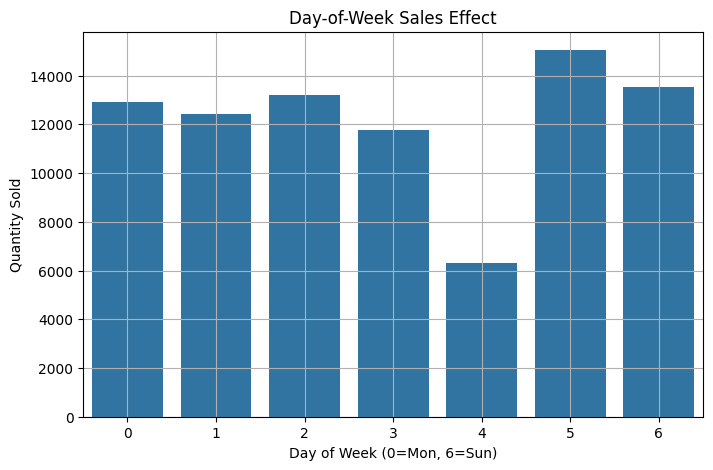

In [108]:
dow_trend = df.groupby('day_of_week')['quantity_sold'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='day_of_week', y='quantity_sold', data=dow_trend)
plt.title("Day-of-Week Sales Effect")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Quantity Sold")
plt.grid()
plt.show()



*   MONTHLY SEASONALITY




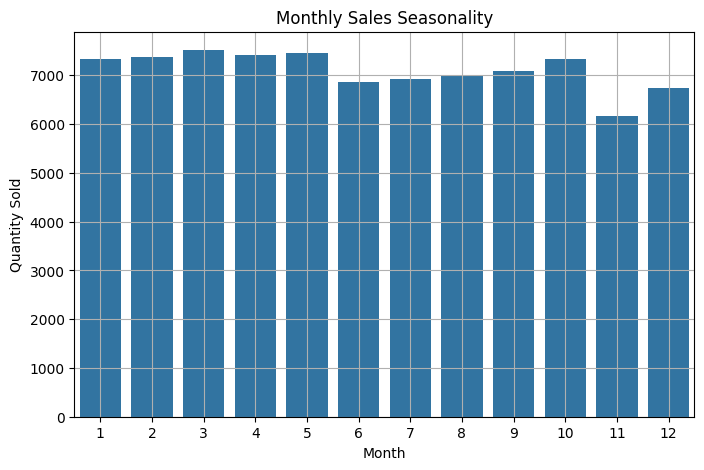

In [109]:
month_trend = df.groupby('month')['quantity_sold'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='month', y='quantity_sold', data=month_trend)
plt.title("Monthly Sales Seasonality")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.grid()
plt.show()



# 5.   PRODUCT-LEVEL EDA






*    TOP PRODUCTS




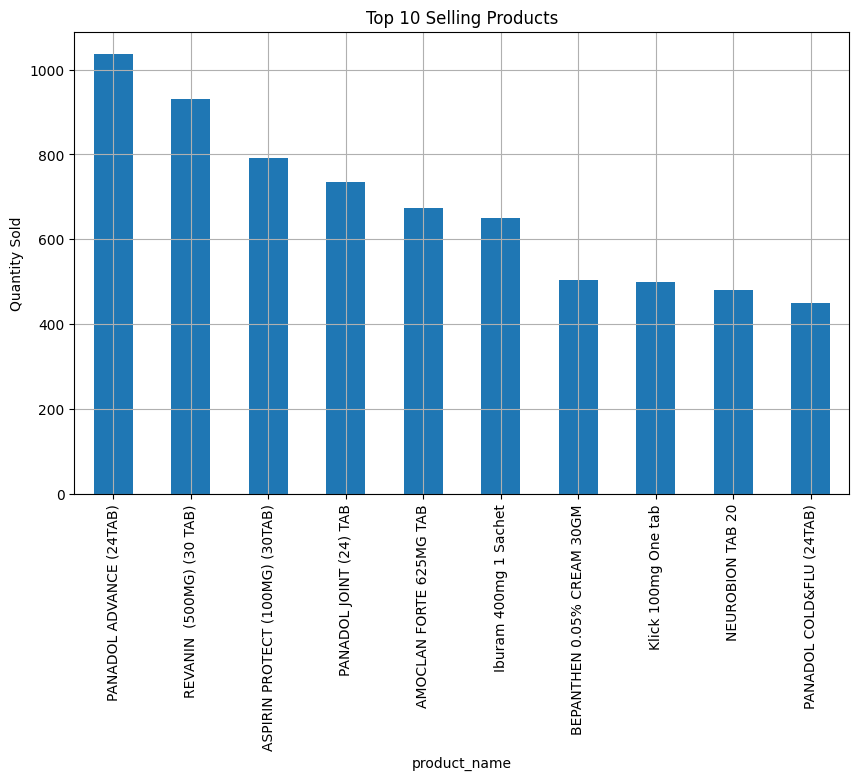

In [110]:
top_products = df[df['quantity_sold'] > 0].groupby('product_name')['quantity_sold'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title("Top 10 Selling Products")
plt.ylabel("Quantity Sold")
plt.grid()
plt.show()



*   MOST RETURNED PRODUCTS




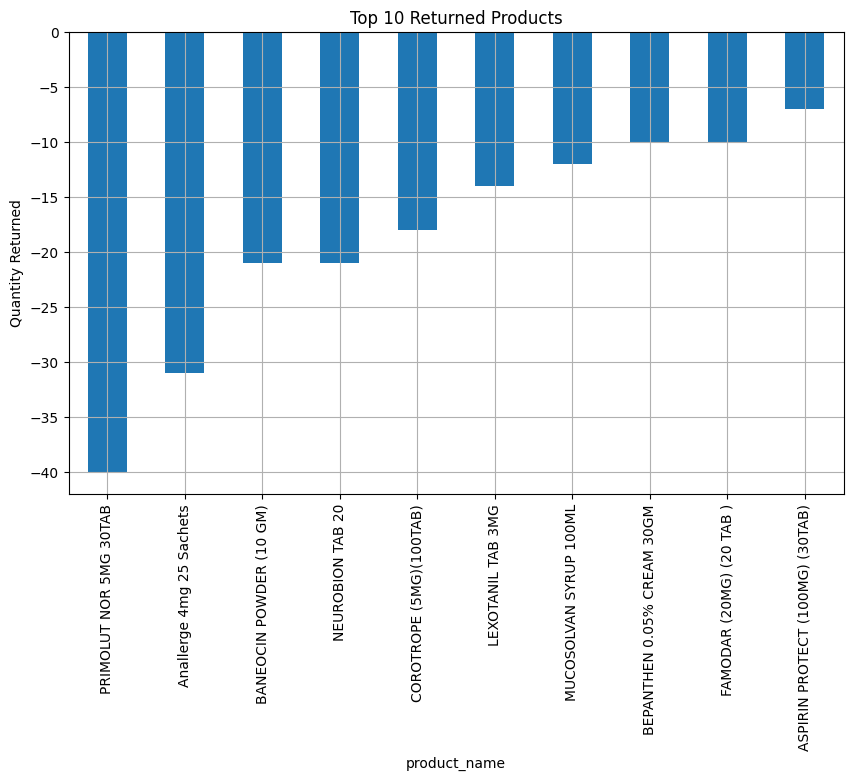

In [111]:
top_returns = df[df['quantity_sold'] < 0].groupby('product_name')['quantity_sold'].sum().sort_values().head(10)

plt.figure(figsize=(10,6))
top_returns.plot(kind='bar')
plt.title("Top 10 Returned Products")
plt.ylabel("Quantity Returned")
plt.grid()
plt.show()



*   PRODUCT VOLATILITY



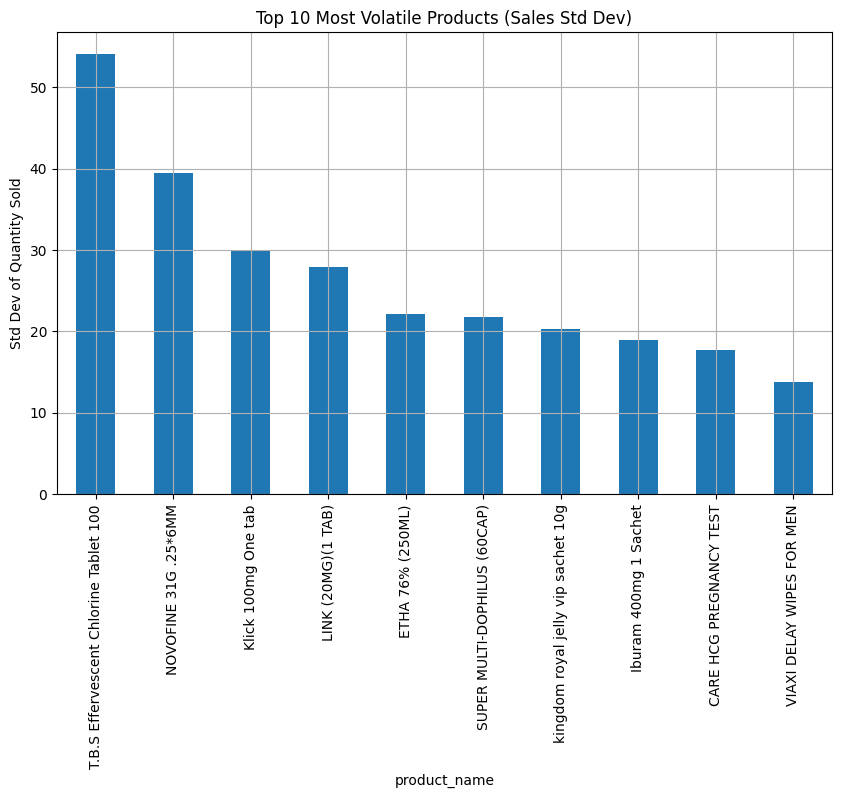

In [112]:
volatility = df.groupby('product_name')['quantity_sold'].std().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
volatility.plot(kind='bar')
plt.title("Top 10 Most Volatile Products (Sales Std Dev)")
plt.ylabel("Std Dev of Quantity Sold")
plt.grid()
plt.show()



# 6.    RETURN RATE PER PRODUCT




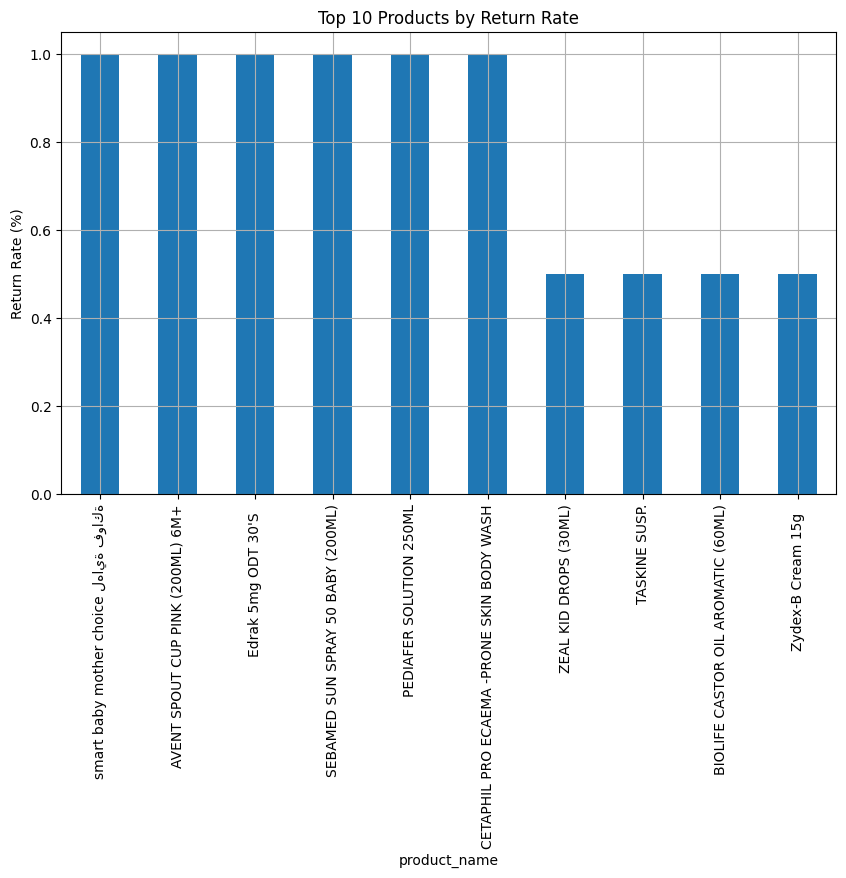

In [ ]:
return_rate_product = (
    df[df['quantity_sold'] != 0]  
    .groupby('product_name')['quantity_sold']
    .apply(lambda x: abs(x[x < 0].sum()) / x[x > 0].sum() if x[x > 0].sum() > 0 else 0)
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
return_rate_product.plot(kind='bar')
plt.title("Top 10 Products by Return Rate")
plt.ylabel("Return Rate (%)")
plt.grid()
plt.show()



# 7.   OUTLIER ANALYSIS




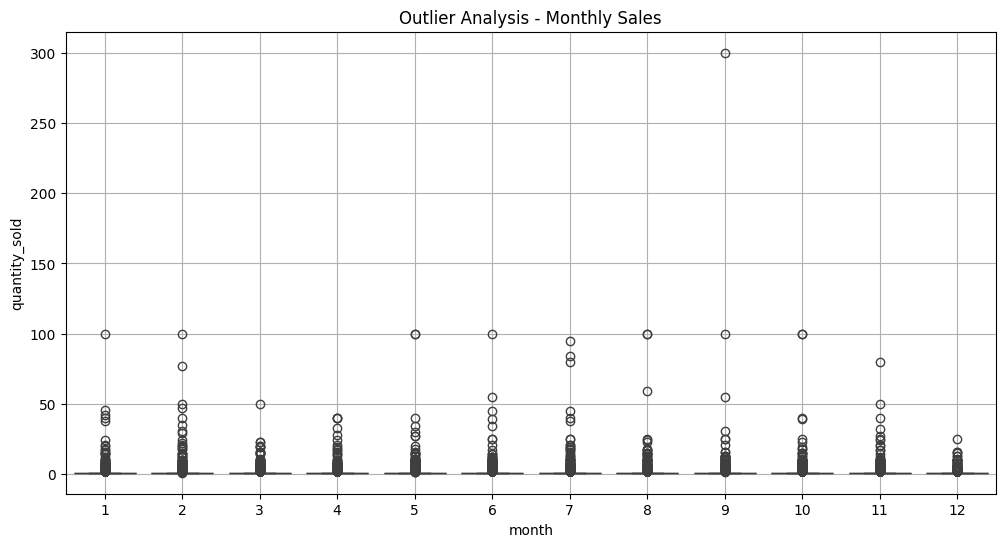

In [114]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='quantity_sold', data=df[df['quantity_sold'] > 0])
plt.title("Outlier Analysis - Monthly Sales")
plt.grid()
plt.show()



# 8.   STATIONARITY CHECK




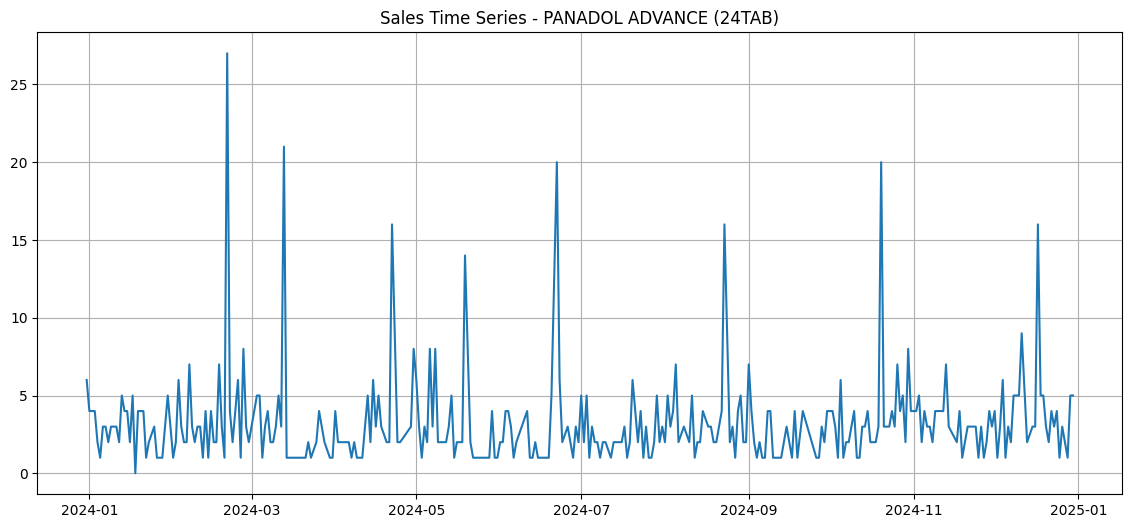

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


top_product_name = top_products.index[0]
product_series = df[df['product_name'] == top_product_name].groupby('date')['quantity_sold'].sum()

plt.figure(figsize=(14,6))
plt.plot(product_series.index, product_series.values)
plt.title(f"Sales Time Series - {top_product_name}")
plt.grid()
plt.show()



*   ACF/PACF




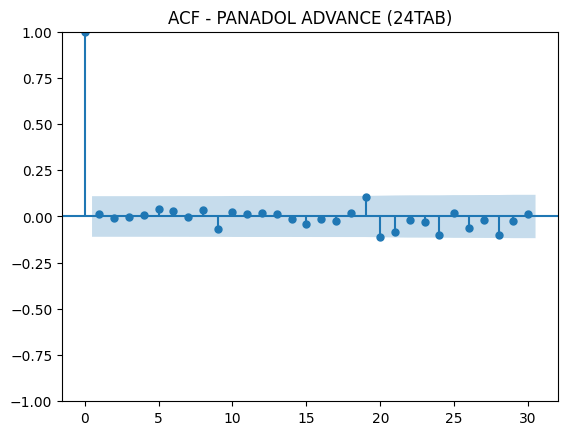

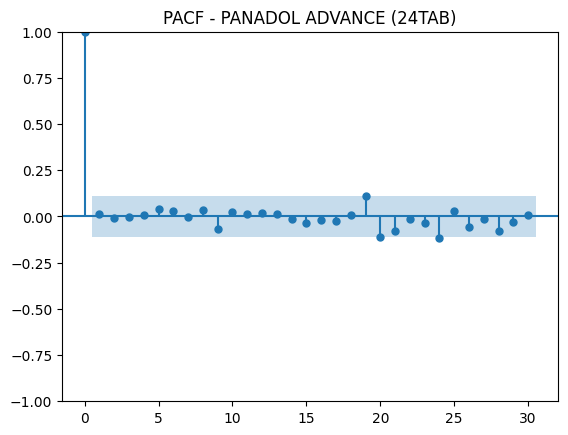

In [116]:
plot_acf(product_series, lags=30)
plt.title(f"ACF - {top_product_name}")
plt.show()

plot_pacf(product_series, lags=30)
plt.title(f"PACF - {top_product_name}")
plt.show()

# **EDA AFTER GROUPING**



1.   Clean product_name
2.   Group quantity_sold
3. get unique product info
4. Merge back product info
5. Final check: any duplicates
6. Save cleaned version
7. Show sample



In [117]:
df['product_name'] = df['product_name'].str.lower().str.strip()

sales_sum = df.groupby(['date', 'product_name']).agg({
    'quantity_sold': 'sum'
}).reset_index()

product_info = df[['product_name', 'sku', 'active_ingredient_filled']].drop_duplicates()

daily_sales = sales_sum.merge(product_info, on='product_name', how='left')

duplicates_after = daily_sales.duplicated(subset=['date', 'product_name']).sum()
print(f"Remaining duplicate rows after clean: {duplicates_after}")

daily_sales.to_csv("Final_data_cleaned.csv", index=False)

daily_sales.head()

Remaining duplicate rows after clean: 3


,date,product_name,quantity_sold,sku,active_ingredient_filled
0,2023-12-31,accu chek performa strips,1.0,Accu Chek Performa Blood Glucose Strip 50,Other
1,2023-12-31,acretin cream ( 0.05%) ( 30gm),1.0,Acretin 0.05% Cream 30g,Tretinoin 0.05 %
2,2023-12-31,acretin cream (0.025%) (30gm ),1.0,Acretin 0.025% Cream 30g,Tretinoin 0.025 %
3,2023-12-31,adol (250 mg) (10 supp),1.0,Adol 250mg Suppository 10,Paracetamol 250 mg
4,2023-12-31,adol syrup (100 ml),2.0,Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml


In [118]:
duplicates_after = daily_sales.duplicated(subset=['date', 'product_name']).sum()
print(f"Remaining duplicate rows after clean: {duplicates_after}")


Remaining duplicate rows after clean: 3


# **Multiple SKU Handeling**

In [119]:
multi_sku_details = daily_sales.groupby('product_name')['sku'].nunique().reset_index()
multi_sku_details = multi_sku_details[multi_sku_details['sku'] > 1]

rows_multi_sku = daily_sales[daily_sales['product_name'].isin(multi_sku_details['product_name'])]

print("Products with multiple SKU:")
display(multi_sku_details)

print("Rows causing multiple SKU problem:")
display(rows_multi_sku)

multi_ing_details = daily_sales.groupby('product_name')['active_ingredient_filled'].nunique().reset_index()
multi_ing_details = multi_ing_details[multi_ing_details['active_ingredient_filled'] > 1]

rows_multi_ing = daily_sales[daily_sales['product_name'].isin(multi_ing_details['product_name'])]

print("Products with multiple active_ingredient_filled:")
display(multi_ing_details)

print("Rows causing multiple active_ingredient_filled problem:")
display(rows_multi_ing)

Products with multiple SKU:


,product_name,sku
2449,proctolain rectal oint.,2


Rows causing multiple SKU problem:


,date,product_name,quantity_sold,sku,active_ingredient_filled
5197,2024-01-31,proctolain rectal oint.,1.0,Proctolain Rectal Ointment 30g,Lidocaine 20 mg + Menthol 2.5 mg + Bismuth Sub...
5198,2024-01-31,proctolain rectal oint.,1.0,Proctolain Suppository 10,Bismuth subgallate 100 mg + Lidocaine 40 mg + ...
56215,2024-12-14,proctolain rectal oint.,1.0,Proctolain Rectal Ointment 30g,Lidocaine 20 mg + Menthol 2.5 mg + Bismuth Sub...
56216,2024-12-14,proctolain rectal oint.,1.0,Proctolain Suppository 10,Bismuth subgallate 100 mg + Lidocaine 40 mg + ...
56371,2024-12-15,proctolain rectal oint.,-1.0,Proctolain Rectal Ointment 30g,Lidocaine 20 mg + Menthol 2.5 mg + Bismuth Sub...
56372,2024-12-15,proctolain rectal oint.,-1.0,Proctolain Suppository 10,Bismuth subgallate 100 mg + Lidocaine 40 mg + ...


Products with multiple active_ingredient_filled:


,product_name,active_ingredient_filled
2449,proctolain rectal oint.,2


Rows causing multiple active_ingredient_filled problem:


,date,product_name,quantity_sold,sku,active_ingredient_filled
5197,2024-01-31,proctolain rectal oint.,1.0,Proctolain Rectal Ointment 30g,Lidocaine 20 mg + Menthol 2.5 mg + Bismuth Sub...
5198,2024-01-31,proctolain rectal oint.,1.0,Proctolain Suppository 10,Bismuth subgallate 100 mg + Lidocaine 40 mg + ...
56215,2024-12-14,proctolain rectal oint.,1.0,Proctolain Rectal Ointment 30g,Lidocaine 20 mg + Menthol 2.5 mg + Bismuth Sub...
56216,2024-12-14,proctolain rectal oint.,1.0,Proctolain Suppository 10,Bismuth subgallate 100 mg + Lidocaine 40 mg + ...
56371,2024-12-15,proctolain rectal oint.,-1.0,Proctolain Rectal Ointment 30g,Lidocaine 20 mg + Menthol 2.5 mg + Bismuth Sub...
56372,2024-12-15,proctolain rectal oint.,-1.0,Proctolain Suppository 10,Bismuth subgallate 100 mg + Lidocaine 40 mg + ...


# **Solve the Problem With adding (30g)**

In [120]:
df.loc[
    df['active_ingredient_filled'] == "Lidocaine 20 mg + Menthol 2.5 mg + Bismuth Subgallate 50 mg",
    'product_name'
] = df['product_name'] + " (30g)"

In [121]:
df['product_name'] = df['product_name'].str.lower().str.strip()

sales_sum = df.groupby(['date', 'product_name']).agg({
    'quantity_sold': 'sum'
}).reset_index()

product_info = df[['product_name', 'sku', 'active_ingredient_filled']].drop_duplicates()

daily_sales = sales_sum.merge(product_info, on='product_name', how='left')

duplicates_after = daily_sales.duplicated(subset=['date', 'product_name']).sum()
print(f"Remaining duplicate rows after clean: {duplicates_after}")

daily_sales.to_csv("Final_data_cleaned.csv", index=False)

daily_sales.head()

Remaining duplicate rows after clean: 0


,date,product_name,quantity_sold,sku,active_ingredient_filled
0,2023-12-31,accu chek performa strips,1.0,Accu Chek Performa Blood Glucose Strip 50,Other
1,2023-12-31,acretin cream ( 0.05%) ( 30gm),1.0,Acretin 0.05% Cream 30g,Tretinoin 0.05 %
2,2023-12-31,acretin cream (0.025%) (30gm ),1.0,Acretin 0.025% Cream 30g,Tretinoin 0.025 %
3,2023-12-31,adol (250 mg) (10 supp),1.0,Adol 250mg Suppository 10,Paracetamol 250 mg
4,2023-12-31,adol syrup (100 ml),2.0,Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml


In [122]:
daily_sales

,date,product_name,quantity_sold,sku,active_ingredient_filled
0,2023-12-31,accu chek performa strips,1.0,Accu Chek Performa Blood Glucose Strip 50,Other
1,2023-12-31,acretin cream ( 0.05%) ( 30gm),1.0,Acretin 0.05% Cream 30g,Tretinoin 0.05 %
2,2023-12-31,acretin cream (0.025%) (30gm ),1.0,Acretin 0.025% Cream 30g,Tretinoin 0.025 %
3,2023-12-31,adol (250 mg) (10 supp),1.0,Adol 250mg Suppository 10,Paracetamol 250 mg
4,2023-12-31,adol syrup (100 ml),2.0,Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml
...,...,...,...,...,...
58658,2024-12-30,zaha (500mg) (3tab),1.0,Zaha 500mg Tablet 3,Azithromycin 500 mg
58659,2024-12-30,zinnat susp 125mg 50ml,1.0,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml
58660,2024-12-30,zomax (500 mg) (3 tab),2.0,Zomax 500mg Tablet 3,Azithromycin 500 mg
58661,2024-12-30,zovirax susp (200 mg/ml) (125ml),1.0,Zovirax 200mg/5ml Suspension 125ml,Aciclovir 200 mg /5 ml


In [123]:
missing_table = pd.DataFrame({
    'Missing Count': daily_sales.isnull().sum(),
    'Total Rows': len(daily_sales),
    'Missing %': 100 * daily_sales.isnull().sum() / len(df)
})

print(missing_table)

                          Missing Count  Total Rows  Missing %
date                                  0       58663        0.0
product_name                          0       58663        0.0
quantity_sold                         0       58663        0.0
sku                                   0       58663        0.0
active_ingredient_filled              0       58663        0.0




# 1.   FEATURES



In [124]:
daily_sales['month'] = daily_sales['date'].dt.month
daily_sales['day_of_week'] = daily_sales['date'].dt.dayofweek
daily_sales['year'] = daily_sales['date'].dt.year

In [125]:
daily_sales

,date,product_name,quantity_sold,sku,active_ingredient_filled,month,day_of_week,year
0,2023-12-31,accu chek performa strips,1.0,Accu Chek Performa Blood Glucose Strip 50,Other,12,6,2023
1,2023-12-31,acretin cream ( 0.05%) ( 30gm),1.0,Acretin 0.05% Cream 30g,Tretinoin 0.05 %,12,6,2023
2,2023-12-31,acretin cream (0.025%) (30gm ),1.0,Acretin 0.025% Cream 30g,Tretinoin 0.025 %,12,6,2023
3,2023-12-31,adol (250 mg) (10 supp),1.0,Adol 250mg Suppository 10,Paracetamol 250 mg,12,6,2023
4,2023-12-31,adol syrup (100 ml),2.0,Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml,12,6,2023
...,...,...,...,...,...,...,...,...
58658,2024-12-30,zaha (500mg) (3tab),1.0,Zaha 500mg Tablet 3,Azithromycin 500 mg,12,0,2024
58659,2024-12-30,zinnat susp 125mg 50ml,1.0,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml,12,0,2024
58660,2024-12-30,zomax (500 mg) (3 tab),2.0,Zomax 500mg Tablet 3,Azithromycin 500 mg,12,0,2024
58661,2024-12-30,zovirax susp (200 mg/ml) (125ml),1.0,Zovirax 200mg/5ml Suspension 125ml,Aciclovir 200 mg /5 ml,12,0,2024


# **Basic time features**

In [126]:
daily_sales['month'] = daily_sales['date'].dt.month
daily_sales['day_of_week'] = daily_sales['date'].dt.dayofweek

# **Data Health**

In [127]:
print("Shape:", daily_sales.shape)
print("\nMissing Values:")
print(daily_sales.isnull().sum())

product_date_counts = daily_sales.groupby('product_name')['date'].nunique().sort_values(ascending=False)
print("\nDate coverage per product (number of unique dates):")
print(product_date_counts.head(10))

Shape: (58663, 8)

Missing Values:
date                        0
product_name                0
quantity_sold               0
sku                         0
active_ingredient_filled    0
month                       0
day_of_week                 0
year                        0
dtype: int64

Date coverage per product (number of unique dates):
product_name
panadol advance (24tab)            318
panadol joint (24) tab             297
amoclan forte 625mg tab            278
aspirin protect (100mg) (30tab)    261
panadol extra optizorb (24 tab)    244
bepanthen 0.05% cream 30gm         219
revanin  (500mg) (30 tab)          210
panadol cold&flu (24tab)           204
pelargos (syrup)  (120ml)          199
neurobion tab 20                   197
Name: date, dtype: int64


# **Product stability**

/tmp/ipython-input-128-2269046678.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  zero_sales_ratio = daily_sales.groupby('product_name').apply(


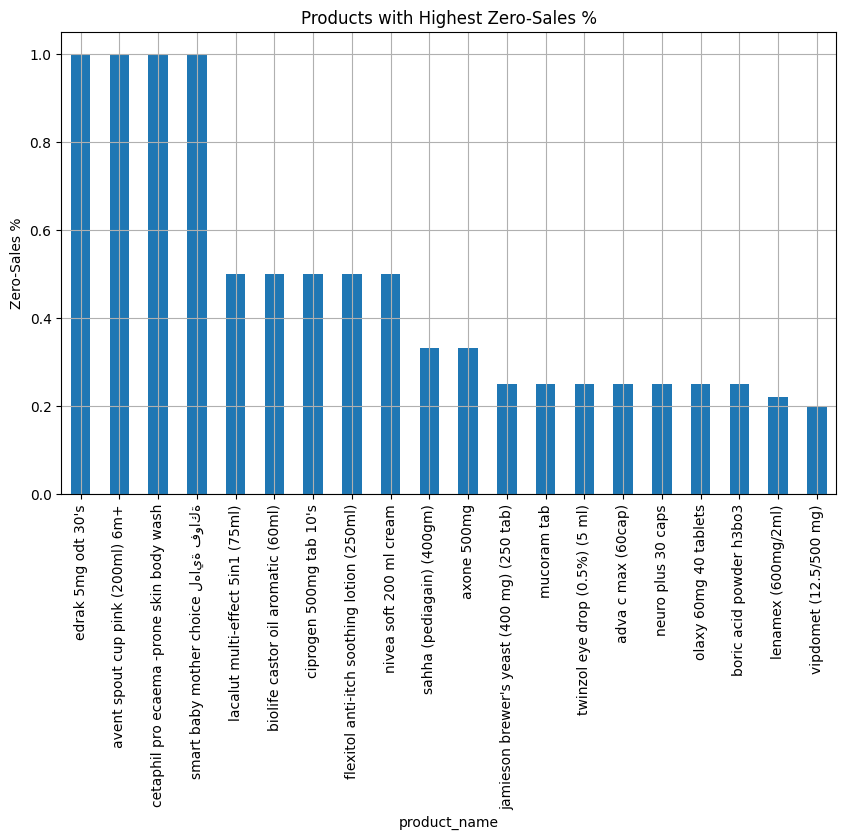

In [128]:
 zero_sales_ratio = daily_sales.groupby('product_name').apply(
    lambda x: (x['quantity_sold'] == 0).sum() / len(x)
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
zero_sales_ratio.head(20).plot(kind='bar')
plt.title("Products with Highest Zero-Sales %")
plt.ylabel("Zero-Sales %")
plt.grid()
plt.show()

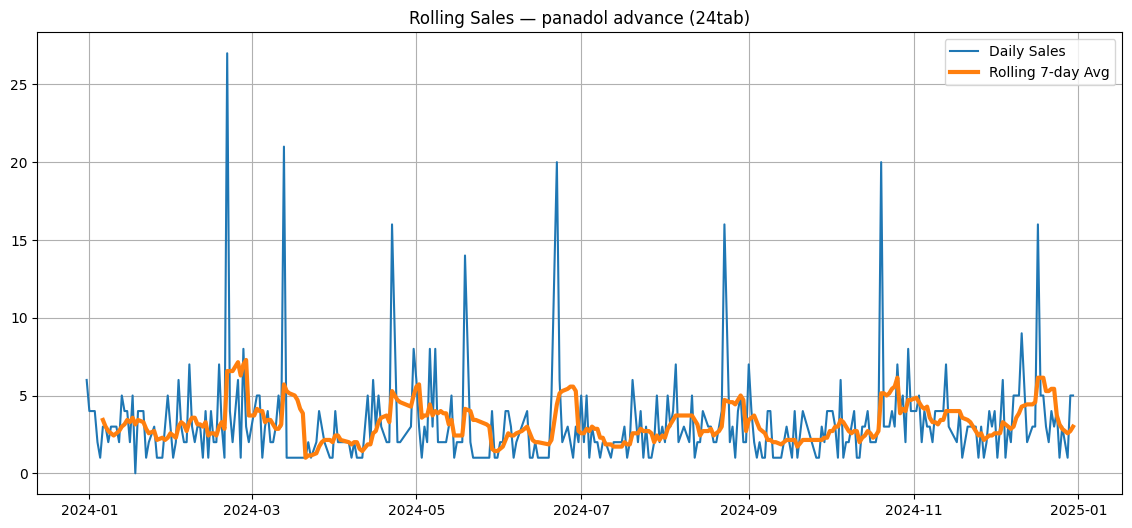

In [129]:
# Rolling mean trend for top product
top_product = daily_sales.groupby('product_name')['quantity_sold'].sum().sort_values(ascending=False).index[0]
prod_series = daily_sales[daily_sales['product_name'] == top_product].set_index('date').sort_index()

# Rolling 7-day mean
prod_series['rolling_7'] = prod_series['quantity_sold'].rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(prod_series.index, prod_series['quantity_sold'], label='Daily Sales')
plt.plot(prod_series.index, prod_series['rolling_7'], label='Rolling 7-day Avg', linewidth=3)
plt.title(f"Rolling Sales — {top_product}")
plt.legend()
plt.grid()
plt.show()

# **Time series decomposition**

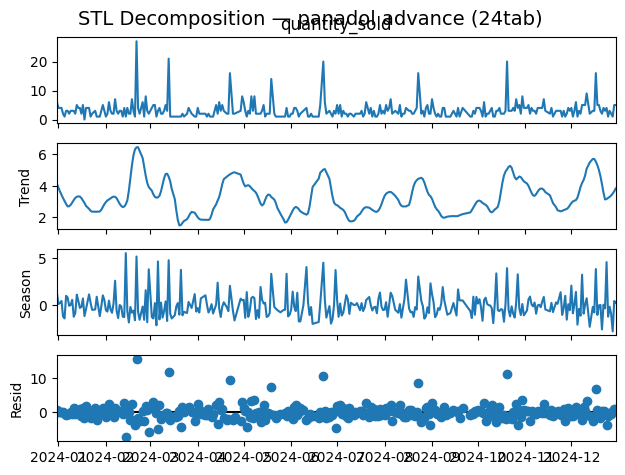

In [130]:
from statsmodels.tsa.seasonal import STL

stl = STL(prod_series['quantity_sold'], period=7)
res = stl.fit()

res.plot()
plt.suptitle(f"STL Decomposition — {top_product}", fontsize=14)
plt.show()

# **Autocorrelation / PACF**

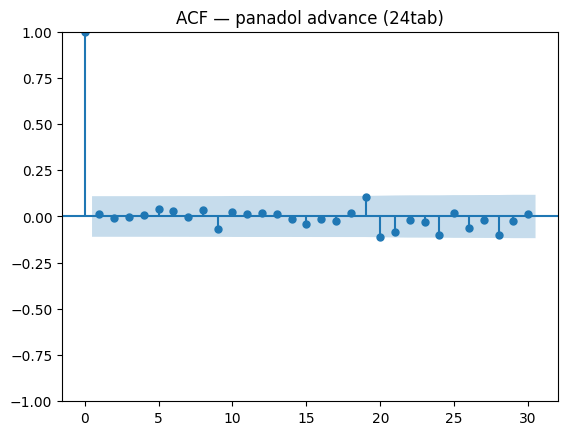

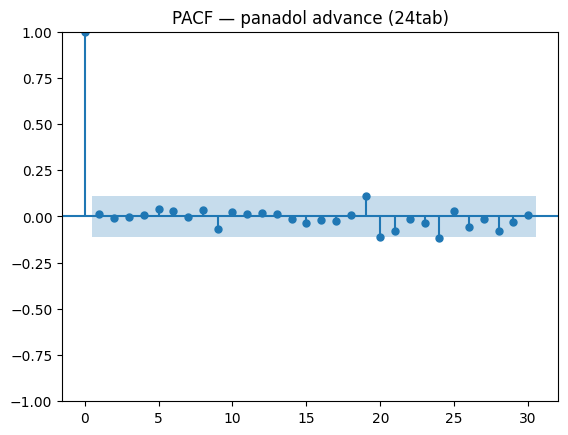

In [131]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(prod_series['quantity_sold'].fillna(0), lags=30)
plt.title(f"ACF — {top_product}")
plt.show()

plot_pacf(prod_series['quantity_sold'].fillna(0), lags=30)
plt.title(f"PACF — {top_product}")
plt.show()

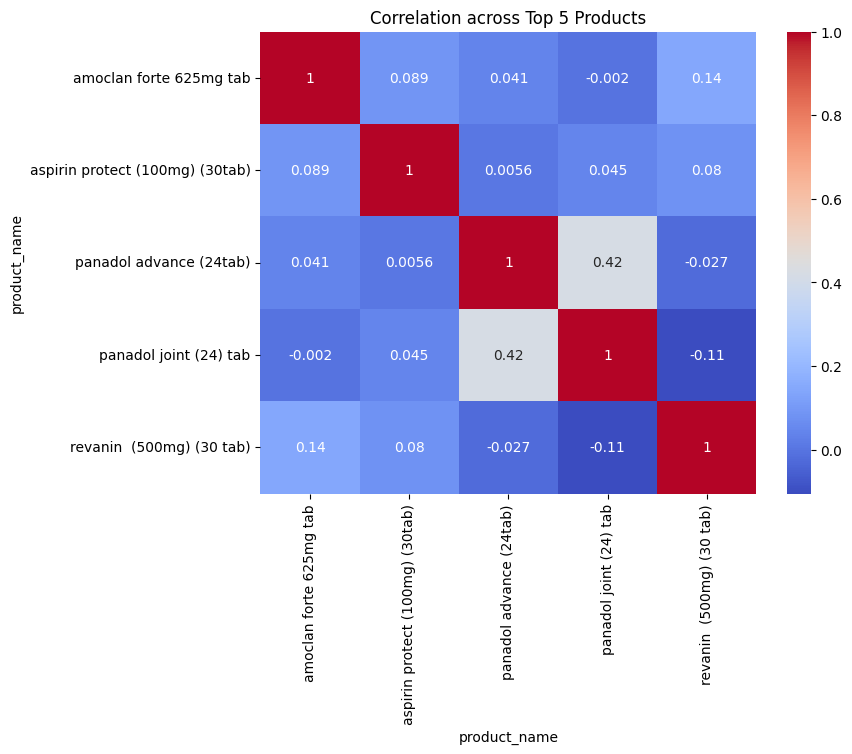

In [132]:
top_5_products = daily_sales.groupby('product_name')['quantity_sold'].sum().sort_values(ascending=False).head(5).index.tolist()

pivot_df = daily_sales[daily_sales['product_name'].isin(top_5_products)].pivot(
    index='date', columns='product_name', values='quantity_sold'
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation across Top 5 Products")
plt.show()


In [77]:
!pip install ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.1 MB/s eta 0:00:00


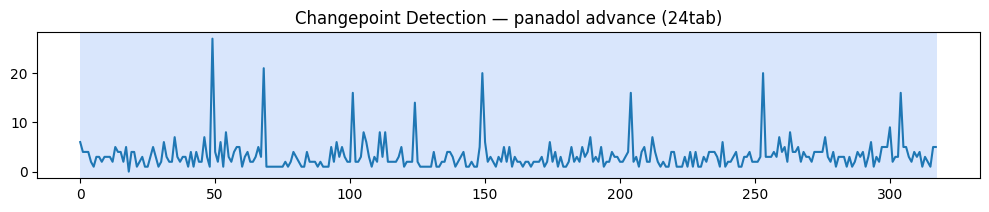

In [133]:
import ruptures as rpt

signal = prod_series['quantity_sold'].fillna(0).values
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

rpt.display(signal, result)
plt.title(f"Changepoint Detection — {top_product}")
plt.show()


In [137]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(prod_series['quantity_sold'].fillna(0))
print(f"ADF p-value: {adf_result[1]:.4f}")
if adf_result[1] < 0.05:
    print("Series is stationary (no trend)")
else:
    print("Series is NOT stationary (has trend)")


ADF p-value: 0.0000
→ Series is stationary (no trend)


In [138]:
from statsmodels.tsa.stattools import adfuller

def adf_pvalue(series):
    series = series.fillna(0)
    try:
        result = adfuller(series)
        return result[1]
    except ValueError:
        return None

adf_results = []

for product in daily_sales['product_name'].unique():
    product_series = daily_sales[daily_sales['product_name'] == product].set_index('date').sort_index()
    series = product_series['quantity_sold']

    pvalue = adf_pvalue(series)
    adf_results.append({
        'product_name': product,
        'adf_pvalue': pvalue,
        'stationary': 'Yes' if pvalue is not None and pvalue < 0.05 else 'No'
    })

adf_df = pd.DataFrame(adf_results).sort_values('adf_pvalue')


print(f"Products tested: {len(adf_df)}")
print("\nTop 10 most stationary products:")
print(adf_df.head(10))

print("\nTop 10 most non-stationary products:")
print(adf_df[adf_df['adf_pvalue'].notnull()].sort_values('adf_pvalue', ascending=False).head(10))

pct_stationary = (adf_df['stationary'] == 'Yes').mean()
print(f"\n of products stationary: {pct_stationary:.2%}")


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Products tested: 3323

Top 10 most stationary products:
                         product_name  adf_pvalue stationary
3227                  recugel e/d 10g         0.0        Yes
920   symbicort (160/4.5) (120 doses)         0.0        Yes
1175                unifed 20 tablets         0.0        Yes
907               nopain 250mg tab 20         0.0        Yes
650        norcetam (400 mg) (30 cap)         0.0        Yes
661   seba med lip defense strawberry         0.0        Yes
2204    pierrot wax orthodontic ( x5)         0.0        Yes
1740        anafranil (25mg) (30 tab)         0.0        Yes
2902          adenuric (80mg) (28tab)         0.0        Yes
2913                epsom salt (50 g)         0.0        Yes

Top 10 most non-stationary products:
                            product_name  adf_pvalue stationary
11         always cotton feel regular 10    1.000000         No
1257              salibet ointment (30g)    1.000000         No
2476               azord (300mg) (10cap)   

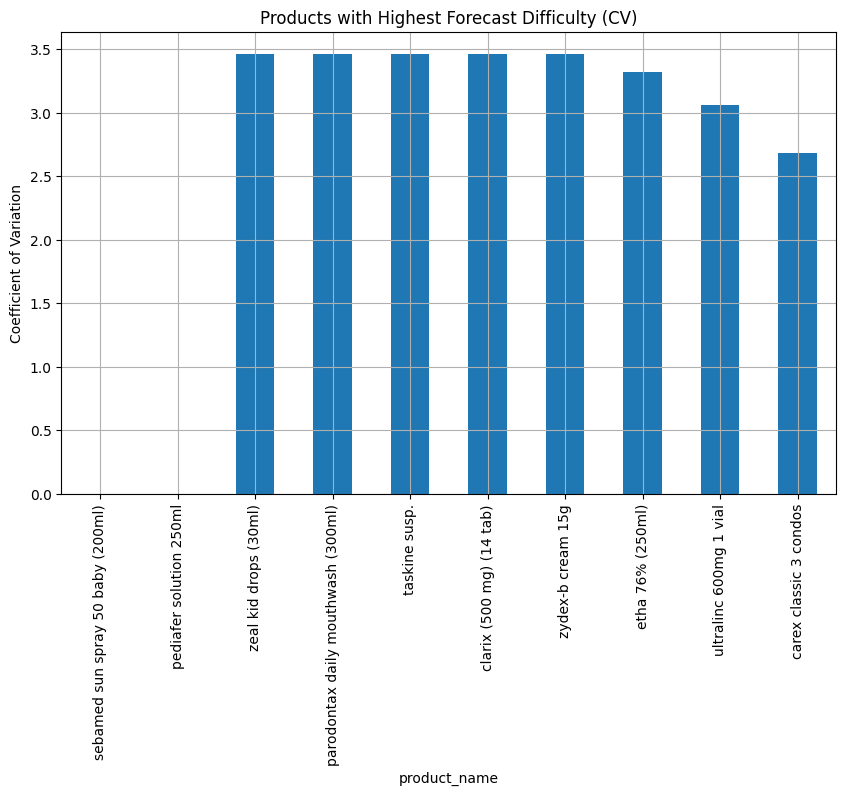

In [139]:
cv_score = daily_sales.groupby('product_name')['quantity_sold'].agg(['mean', 'std'])
cv_score['cv'] = cv_score['std'] / cv_score['mean']
cv_score = cv_score.sort_values('cv', ascending=False).head(10)

cv_score['cv'].plot(kind='bar', figsize=(10,6))
plt.title("Products with Highest Forecast Difficulty (CV)")
plt.ylabel("Coefficient of Variation")
plt.grid()
plt.show()

In [140]:
daily_sales.to_csv("Final_data.csv")

In [141]:
daily_sales

,date,product_name,quantity_sold,sku,active_ingredient_filled,month,day_of_week,year
0,2023-12-31,accu chek performa strips,1.0,Accu Chek Performa Blood Glucose Strip 50,Other,12,6,2023
1,2023-12-31,acretin cream ( 0.05%) ( 30gm),1.0,Acretin 0.05% Cream 30g,Tretinoin 0.05 %,12,6,2023
2,2023-12-31,acretin cream (0.025%) (30gm ),1.0,Acretin 0.025% Cream 30g,Tretinoin 0.025 %,12,6,2023
3,2023-12-31,adol (250 mg) (10 supp),1.0,Adol 250mg Suppository 10,Paracetamol 250 mg,12,6,2023
4,2023-12-31,adol syrup (100 ml),2.0,Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml,12,6,2023
...,...,...,...,...,...,...,...,...
58658,2024-12-30,zaha (500mg) (3tab),1.0,Zaha 500mg Tablet 3,Azithromycin 500 mg,12,0,2024
58659,2024-12-30,zinnat susp 125mg 50ml,1.0,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml,12,0,2024
58660,2024-12-30,zomax (500 mg) (3 tab),2.0,Zomax 500mg Tablet 3,Azithromycin 500 mg,12,0,2024
58661,2024-12-30,zovirax susp (200 mg/ml) (125ml),1.0,Zovirax 200mg/5ml Suspension 125ml,Aciclovir 200 mg /5 ml,12,0,2024


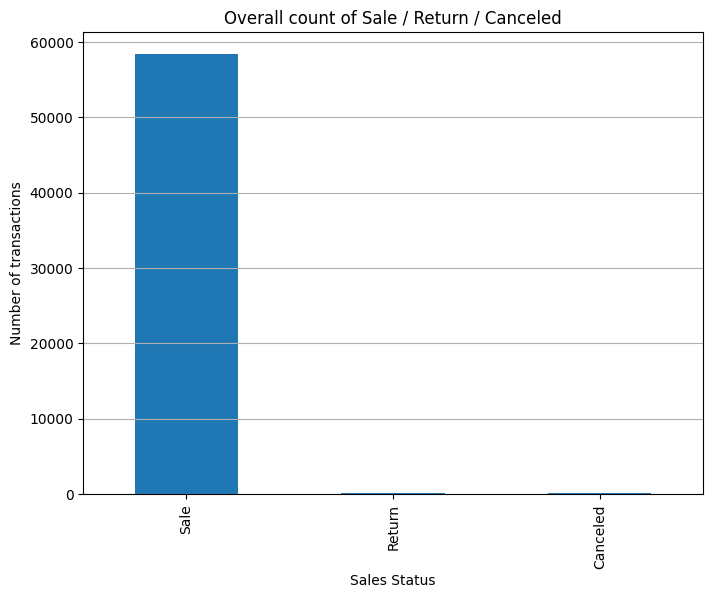

In [146]:
daily_sales['sales_status'] = daily_sales['quantity_sold'].apply(
    lambda x: 'Sale' if x > 0 else ('Return' if x < 0 else 'Canceled')
)

sales_status_counts = daily_sales['sales_status'].value_counts()

plt.figure(figsize=(8,6))
sales_status_counts.plot(kind='bar')
plt.title('Overall count of Sale / Return / Canceled')
plt.ylabel('Number of transactions')
plt.xlabel('Sales Status')
plt.grid(axis='y')
plt.show()

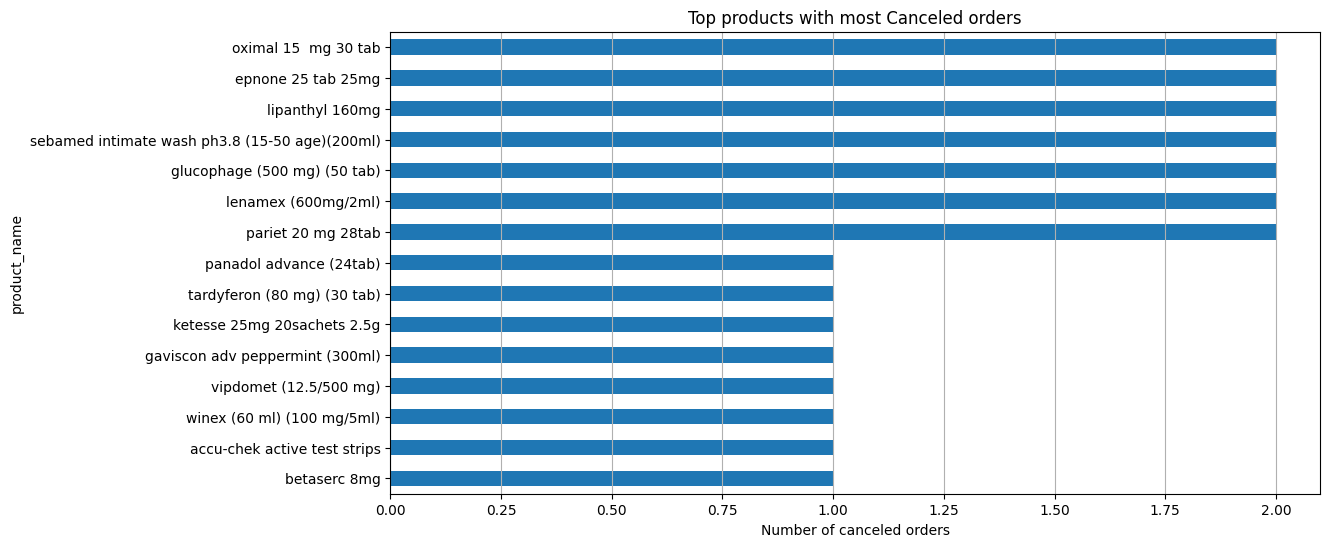

In [154]:
top_canceled = daily_sales[daily_sales['sales_status'] == 'Canceled']['product_name'].value_counts().head(15)

plt.figure(figsize=(12,6))
top_canceled.plot(kind='barh')
plt.title('Top products with most Canceled orders')
plt.xlabel('Number of canceled orders')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


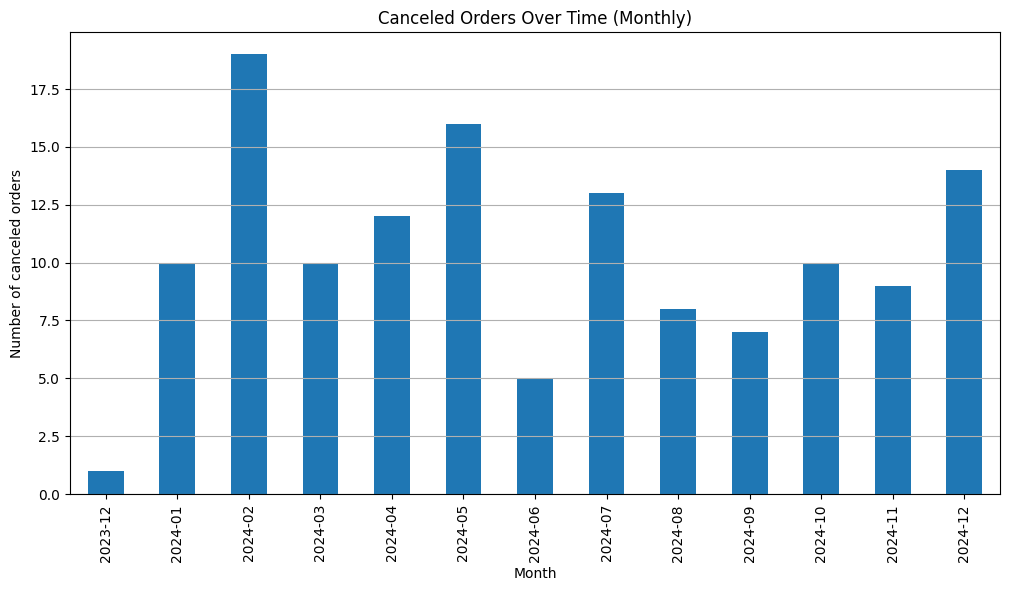

In [155]:
daily_sales['month'] = daily_sales['date'].dt.to_period('M')
canceled_over_time = daily_sales[daily_sales['sales_status'] == 'Canceled'].groupby('month').size()

plt.figure(figsize=(12,6))
canceled_over_time.plot(kind='bar')
plt.title('Canceled Orders Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of canceled orders')
plt.grid(axis='y')
plt.show()


In [157]:
daily_sales

,date,product_name,quantity_sold,sku,active_ingredient_filled,month,day_of_week,year,sales_status
0,2023-12-31,accu chek performa strips,1.0,Accu Chek Performa Blood Glucose Strip 50,Other,2023-12,6,2023,Sale
1,2023-12-31,acretin cream ( 0.05%) ( 30gm),1.0,Acretin 0.05% Cream 30g,Tretinoin 0.05 %,2023-12,6,2023,Sale
2,2023-12-31,acretin cream (0.025%) (30gm ),1.0,Acretin 0.025% Cream 30g,Tretinoin 0.025 %,2023-12,6,2023,Sale
3,2023-12-31,adol (250 mg) (10 supp),1.0,Adol 250mg Suppository 10,Paracetamol 250 mg,2023-12,6,2023,Sale
4,2023-12-31,adol syrup (100 ml),2.0,Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml,2023-12,6,2023,Sale
...,...,...,...,...,...,...,...,...,...
58658,2024-12-30,zaha (500mg) (3tab),1.0,Zaha 500mg Tablet 3,Azithromycin 500 mg,2024-12,0,2024,Sale
58659,2024-12-30,zinnat susp 125mg 50ml,1.0,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml,2024-12,0,2024,Sale
58660,2024-12-30,zomax (500 mg) (3 tab),2.0,Zomax 500mg Tablet 3,Azithromycin 500 mg,2024-12,0,2024,Sale
58661,2024-12-30,zovirax susp (200 mg/ml) (125ml),1.0,Zovirax 200mg/5ml Suspension 125ml,Aciclovir 200 mg /5 ml,2024-12,0,2024,Sale


In [160]:
daily_sales["quantity_sold"].unique()

array([  1.   ,   2.   ,  17.   ,   5.   ,   3.   ,   0.   ,  13.   ,
         4.   ,   6.   ,  10.   ,   7.   ,  16.   ,   8.   , 100.   ,
        15.   ,  20.   ,  53.   ,  12.   ,   9.   ,  11.   ,  -1.   ,
        21.   ,  40.   ,  44.   ,  51.   ,  38.   ,  -2.   ,  24.   ,
        47.   ,  18.   ,  77.   ,   1.041,  22.   ,  35.   ,   1.25 ,
        27.   ,  14.   ,  37.   ,  50.   , -12.   ,  23.   ,  19.   ,
        -4.   ,  33.   ,  11.5  ,   5.667,   6.75 ,   2.6  ,  30.   ,
        -3.   ,  25.   ,  34.   ,  45.   ,  39.   ,  56.   ,  84.   ,
        26.   ,  95.   ,  80.   ,   1.5  ,  -5.   ,  -6.   ,  31.   ,
        55.   , 300.   ,  32.   , -18.   ,  -4.5  , -10.   , 200.   ,
       120.   ])

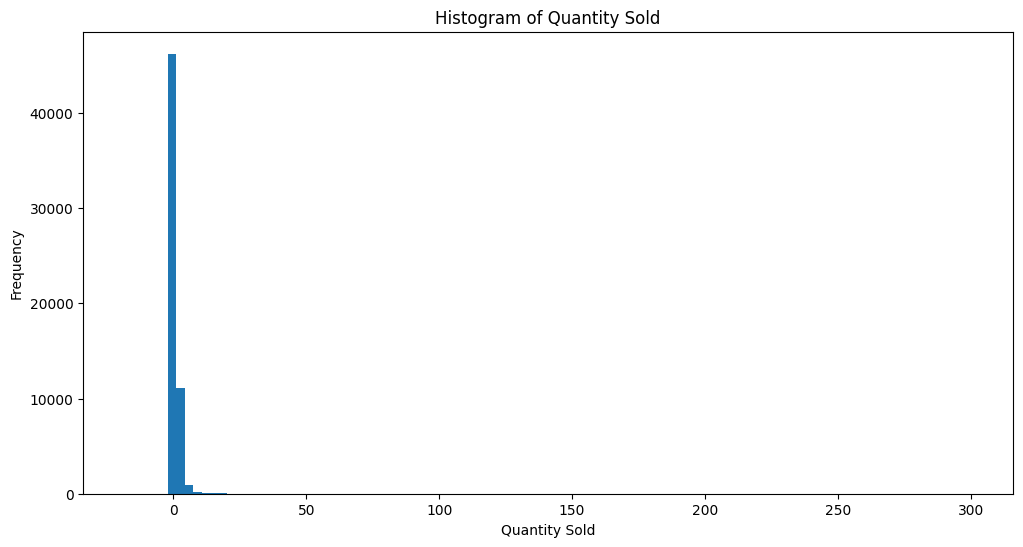

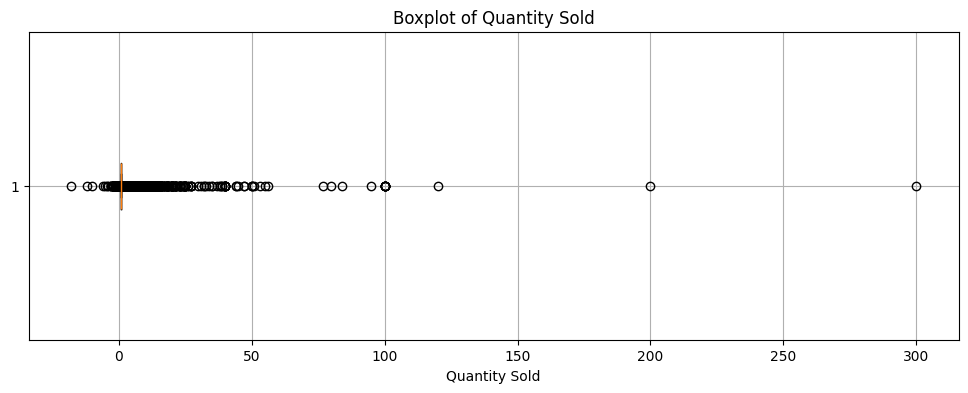

In [158]:
plt.figure(figsize=(12,6))
daily_sales['quantity_sold'].hist(bins=100)
plt.title('Histogram of Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.grid()
plt.show()

plt.figure(figsize=(12,4))
plt.boxplot(daily_sales['quantity_sold'], vert=False)
plt.title('Boxplot of Quantity Sold')
plt.xlabel('Quantity Sold')
plt.grid()
plt.show()


In [161]:
daily_sales['log_quantity_sold'] = np.log1p(daily_sales['quantity_sold'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [162]:
daily_sales

,date,product_name,quantity_sold,sku,active_ingredient_filled,month,day_of_week,year,sales_status,log_quantity_sold
0,2023-12-31,accu chek performa strips,1.0,Accu Chek Performa Blood Glucose Strip 50,Other,2023-12,6,2023,Sale,0.693147
1,2023-12-31,acretin cream ( 0.05%) ( 30gm),1.0,Acretin 0.05% Cream 30g,Tretinoin 0.05 %,2023-12,6,2023,Sale,0.693147
2,2023-12-31,acretin cream (0.025%) (30gm ),1.0,Acretin 0.025% Cream 30g,Tretinoin 0.025 %,2023-12,6,2023,Sale,0.693147
3,2023-12-31,adol (250 mg) (10 supp),1.0,Adol 250mg Suppository 10,Paracetamol 250 mg,2023-12,6,2023,Sale,0.693147
4,2023-12-31,adol syrup (100 ml),2.0,Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml,2023-12,6,2023,Sale,1.098612
...,...,...,...,...,...,...,...,...,...,...
58658,2024-12-30,zaha (500mg) (3tab),1.0,Zaha 500mg Tablet 3,Azithromycin 500 mg,2024-12,0,2024,Sale,0.693147
58659,2024-12-30,zinnat susp 125mg 50ml,1.0,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml,2024-12,0,2024,Sale,0.693147
58660,2024-12-30,zomax (500 mg) (3 tab),2.0,Zomax 500mg Tablet 3,Azithromycin 500 mg,2024-12,0,2024,Sale,1.098612
58661,2024-12-30,zovirax susp (200 mg/ml) (125ml),1.0,Zovirax 200mg/5ml Suspension 125ml,Aciclovir 200 mg /5 ml,2024-12,0,2024,Sale,0.693147


In [164]:
df = pd.read_csv("/content/Final_data.csv")
df

,Unnamed: 0,date,product_name,quantity_sold,sku,active_ingredient_filled,month,day_of_week,year
0,0,2023-12-31,accu chek performa strips,1.0,Accu Chek Performa Blood Glucose Strip 50,Other,12,6,2023
1,1,2023-12-31,acretin cream ( 0.05%) ( 30gm),1.0,Acretin 0.05% Cream 30g,Tretinoin 0.05 %,12,6,2023
2,2,2023-12-31,acretin cream (0.025%) (30gm ),1.0,Acretin 0.025% Cream 30g,Tretinoin 0.025 %,12,6,2023
3,3,2023-12-31,adol (250 mg) (10 supp),1.0,Adol 250mg Suppository 10,Paracetamol 250 mg,12,6,2023
4,4,2023-12-31,adol syrup (100 ml),2.0,Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml,12,6,2023
...,...,...,...,...,...,...,...,...,...
58658,58658,2024-12-30,zaha (500mg) (3tab),1.0,Zaha 500mg Tablet 3,Azithromycin 500 mg,12,0,2024
58659,58659,2024-12-30,zinnat susp 125mg 50ml,1.0,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml,12,0,2024
58660,58660,2024-12-30,zomax (500 mg) (3 tab),2.0,Zomax 500mg Tablet 3,Azithromycin 500 mg,12,0,2024
58661,58661,2024-12-30,zovirax susp (200 mg/ml) (125ml),1.0,Zovirax 200mg/5ml Suspension 125ml,Aciclovir 200 mg /5 ml,12,0,2024


In [165]:
daily_sales_model = df[daily_sales['quantity_sold'] > 0].copy()

daily_sales_model['log_quantity_sold'] = np.log1p(daily_sales_model['quantity_sold'])

In [166]:
daily_sales_model

,Unnamed: 0,date,product_name,quantity_sold,sku,active_ingredient_filled,month,day_of_week,year,log_quantity_sold
0,0,2023-12-31,accu chek performa strips,1.0,Accu Chek Performa Blood Glucose Strip 50,Other,12,6,2023,0.693147
1,1,2023-12-31,acretin cream ( 0.05%) ( 30gm),1.0,Acretin 0.05% Cream 30g,Tretinoin 0.05 %,12,6,2023,0.693147
2,2,2023-12-31,acretin cream (0.025%) (30gm ),1.0,Acretin 0.025% Cream 30g,Tretinoin 0.025 %,12,6,2023,0.693147
3,3,2023-12-31,adol (250 mg) (10 supp),1.0,Adol 250mg Suppository 10,Paracetamol 250 mg,12,6,2023,0.693147
4,4,2023-12-31,adol syrup (100 ml),2.0,Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml,12,6,2023,1.098612
...,...,...,...,...,...,...,...,...,...,...
58658,58658,2024-12-30,zaha (500mg) (3tab),1.0,Zaha 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,0.693147
58659,58659,2024-12-30,zinnat susp 125mg 50ml,1.0,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml,12,0,2024,0.693147
58660,58660,2024-12-30,zomax (500 mg) (3 tab),2.0,Zomax 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,1.098612
58661,58661,2024-12-30,zovirax susp (200 mg/ml) (125ml),1.0,Zovirax 200mg/5ml Suspension 125ml,Aciclovir 200 mg /5 ml,12,0,2024,0.693147


In [168]:
daily_sales_model["log_quantity_sold"].unique()

array([0.69314718, 1.09861229, 2.89037176, 1.79175947, 1.38629436,
       2.63905733, 1.60943791, 1.94591015, 2.39789527, 2.07944154,
       2.83321334, 2.19722458, 4.61512052, 2.77258872, 3.04452244,
       3.98898405, 2.56494936, 2.30258509, 2.48490665, 3.09104245,
       3.71357207, 3.80666249, 3.95124372, 3.66356165, 3.21887582,
       3.87120101, 2.94443898, 4.35670883, 0.71343988, 3.13549422,
       3.58351894, 0.81093022, 3.33220451, 2.7080502 , 3.63758616,
       3.93182563, 3.17805383, 2.99573227, 3.52636052, 2.52572864,
       1.89716998, 2.04769284, 1.28093385, 3.4339872 , 3.25809654,
       3.55534806, 3.8286414 , 3.68887945, 4.04305127, 4.44265126,
       3.29583687, 4.56434819, 4.39444915, 0.91629073, 3.4657359 ,
       4.02535169, 5.70711026, 3.49650756, 5.30330491, 4.79579055])

In [169]:
daily_sales_model.to_csv("Final_cleaned_data.csv")

In [225]:
df = pd.read_csv("/content/Final_cleaned_data.csv")
df

,date,product_name,sku,active_ingredient_filled,month,day_of_week,year,log_quantity_sold
0,12/31/2023,accu chek performa strips,Accu Chek Performa Blood Glucose Strip 50,Other,12,6,2023,0.693147
1,12/31/2023,acretin cream ( 0.05%) ( 30gm),Acretin 0.05% Cream 30g,Tretinoin 0.05 %,12,6,2023,0.693147
2,12/31/2023,acretin cream (0.025%) (30gm ),Acretin 0.025% Cream 30g,Tretinoin 0.025 %,12,6,2023,0.693147
3,12/31/2023,adol (250 mg) (10 supp),Adol 250mg Suppository 10,Paracetamol 250 mg,12,6,2023,0.693147
4,12/31/2023,adol syrup (100 ml),Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml,12,6,2023,1.098612
...,...,...,...,...,...,...,...,...
58373,12/30/2024,zaha (500mg) (3tab),Zaha 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,0.693147
58374,12/30/2024,zinnat susp 125mg 50ml,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml,12,0,2024,0.693147
58375,12/30/2024,zomax (500 mg) (3 tab),Zomax 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,1.098612
58376,12/30/2024,zovirax susp (200 mg/ml) (125ml),Zovirax 200mg/5ml Suspension 125ml,Aciclovir 200 mg /5 ml,12,0,2024,0.693147


In [228]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['product_name_encoded'] = le.fit_transform(df['product_name'])

product_mapping = pd.DataFrame({
    'product_name': le.classes_,
    'product_name_encoded': range(len(le.classes_))
})
product_mapping.to_csv('/content/product_name_encoding_mapping.csv', index=False)
product_mapping.head()

,product_name,product_name_encoded
0,accu chek performa strips,0
1,accu-chek active test strips,1
2,ace press (5mg) (30tab),2
3,ace press 10 mg 30 tab,3
4,acetazolamide (250mg)(30tab),4


In [229]:
df

,date,product_name,sku,active_ingredient_filled,month,day_of_week,year,log_quantity_sold,product_name_encoded
0,12/31/2023,accu chek performa strips,Accu Chek Performa Blood Glucose Strip 50,Other,12,6,2023,0.693147,0
1,12/31/2023,acretin cream ( 0.05%) ( 30gm),Acretin 0.05% Cream 30g,Tretinoin 0.05 %,12,6,2023,0.693147,13
2,12/31/2023,acretin cream (0.025%) (30gm ),Acretin 0.025% Cream 30g,Tretinoin 0.025 %,12,6,2023,0.693147,14
3,12/31/2023,adol (250 mg) (10 supp),Adol 250mg Suppository 10,Paracetamol 250 mg,12,6,2023,0.693147,28
4,12/31/2023,adol syrup (100 ml),Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml,12,6,2023,1.098612,33
...,...,...,...,...,...,...,...,...,...
58373,12/30/2024,zaha (500mg) (3tab),Zaha 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,0.693147,3243
58374,12/30/2024,zinnat susp 125mg 50ml,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml,12,0,2024,0.693147,3271
58375,12/30/2024,zomax (500 mg) (3 tab),Zomax 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,1.098612,3286
58376,12/30/2024,zovirax susp (200 mg/ml) (125ml),Zovirax 200mg/5ml Suspension 125ml,Aciclovir 200 mg /5 ml,12,0,2024,0.693147,3299


In [230]:
df.to_csv("Final_cleaned_encoded_data.csv")

In [48]:
df = pd.read_csv("/content/drive/MyDrive/Mina /Data Science Technical Assessment/Final_cleaned_encoded_data.csv")
df

,date,product_name,sku,active_ingredient_filled,month,day_of_week,year,log_quantity_sold,product_name_encoded
0,12/31/2023,accu chek performa strips,Accu Chek Performa Blood Glucose Strip 50,Other,12,6,2023,0.693147,0
1,12/31/2023,acretin cream ( 0.05%) ( 30gm),Acretin 0.05% Cream 30g,Tretinoin 0.05 %,12,6,2023,0.693147,13
2,12/31/2023,acretin cream (0.025%) (30gm ),Acretin 0.025% Cream 30g,Tretinoin 0.025 %,12,6,2023,0.693147,14
3,12/31/2023,adol (250 mg) (10 supp),Adol 250mg Suppository 10,Paracetamol 250 mg,12,6,2023,0.693147,28
4,12/31/2023,adol syrup (100 ml),Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml,12,6,2023,1.098612,33
...,...,...,...,...,...,...,...,...,...
58373,12/30/2024,zaha (500mg) (3tab),Zaha 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,0.693147,3243
58374,12/30/2024,zinnat susp 125mg 50ml,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml,12,0,2024,0.693147,3271
58375,12/30/2024,zomax (500 mg) (3 tab),Zomax 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,1.098612,3286
58376,12/30/2024,zovirax susp (200 mg/ml) (125ml),Zovirax 200mg/5ml Suspension 125ml,Aciclovir 200 mg /5 ml,12,0,2024,0.693147,3299


In [49]:
df['quantity_sold'] = np.expm1(df['log_quantity_sold'])
df

,date,product_name,sku,active_ingredient_filled,month,day_of_week,year,log_quantity_sold,product_name_encoded,quantity_sold
0,12/31/2023,accu chek performa strips,Accu Chek Performa Blood Glucose Strip 50,Other,12,6,2023,0.693147,0,1.0
1,12/31/2023,acretin cream ( 0.05%) ( 30gm),Acretin 0.05% Cream 30g,Tretinoin 0.05 %,12,6,2023,0.693147,13,1.0
2,12/31/2023,acretin cream (0.025%) (30gm ),Acretin 0.025% Cream 30g,Tretinoin 0.025 %,12,6,2023,0.693147,14,1.0
3,12/31/2023,adol (250 mg) (10 supp),Adol 250mg Suppository 10,Paracetamol 250 mg,12,6,2023,0.693147,28,1.0
4,12/31/2023,adol syrup (100 ml),Adol 250mg Suspension 100ml,Paracetamol 250 mg /5 ml,12,6,2023,1.098612,33,2.0
...,...,...,...,...,...,...,...,...,...,...
58373,12/30/2024,zaha (500mg) (3tab),Zaha 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,0.693147,3243,1.0
58374,12/30/2024,zinnat susp 125mg 50ml,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml,12,0,2024,0.693147,3271,1.0
58375,12/30/2024,zomax (500 mg) (3 tab),Zomax 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,1.098612,3286,2.0
58376,12/30/2024,zovirax susp (200 mg/ml) (125ml),Zovirax 200mg/5ml Suspension 125ml,Aciclovir 200 mg /5 ml,12,0,2024,0.693147,3299,1.0


In [50]:
# Lag features
df['lag_1'] = df.groupby('product_name')['quantity_sold'].shift(1)
df['lag_7'] = df.groupby('product_name')['quantity_sold'].shift(7)

# Rolling mean features
df['rolling_mean_7'] = df.groupby('product_name')['quantity_sold'].shift(1).rolling(7).mean()
df['rolling_mean_14'] = df.groupby('product_name')['quantity_sold'].shift(1).rolling(14).mean()

# Rolling std (volatility)
df['rolling_std_7'] = df.groupby('product_name')['quantity_sold'].shift(1).rolling(7).std()

# Days since last sale
df['sale_flag'] = df['quantity_sold'].gt(0).astype(int)

df['days_since_last_sale'] = df.groupby('product_name')['sale_flag'].cumsum()
df['days_since_last_sale'] = df.groupby('product_name')['days_since_last_sale'].shift(1)
df['days_since_last_sale'] = df.groupby('product_name')['days_since_last_sale'].fillna(method='ffill').fillna(999)

df = df.dropna().reset_index(drop=True)
df.head()

/tmp/ipython-input-50-4129651086.py:17: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['days_since_last_sale'] = df.groupby('product_name')['days_since_last_sale'].fillna(method='ffill').fillna(999)
/tmp/ipython-input-50-4129651086.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['days_since_last_sale'] = df.groupby('product_name')['days_since_last_sale'].fillna(method='ffill').fillna(999)


,date,product_name,sku,active_ingredient_filled,month,day_of_week,year,log_quantity_sold,product_name_encoded,quantity_sold,lag_1,lag_7,rolling_mean_7,rolling_mean_14,rolling_std_7,sale_flag,days_since_last_sale
0,1/13/2024,amoclan forte 625mg tab,Amoclan Forte 625mg Tablet 15,Amoxicillin 500 mg + Clavulanic Acid 125 mg,1,5,2024,1.386294,128,3.0,1.0,4.0,1.142857,1.642857,0.377964,1,10.0
1,1/15/2024,primolut nor 5mg 30tab,Primolut Nor 5mg Tablet 20,Norethisterone Acetate 5 mg,1,0,2024,0.693147,2439,1.0,1.0,2.0,1.571429,1.428571,1.133893,1,7.0
2,1/16/2024,panadol advance (24tab),Panadol Advance 500mg Tablet 24,Paracetamol 500 Mg,1,1,2024,1.098612,2223,2.0,4.0,3.0,2.000000,1.571429,1.000000,1,16.0
3,1/16/2024,panadol cold&flu (24tab),Panadol Cold & Flu Tablet 24,Chlorpheniramine maleate 2 mg + Paracetamol 50...,1,1,2024,1.098612,2227,2.0,1.0,1.0,1.714286,1.500000,1.112697,1,12.0
4,1/16/2024,panadol extra optizorb (24 tab),Panadol Extra 500/65mg Tablet 24,Paracetamol 500 mg + Caffeine 65 mg,1,1,2024,0.693147,2229,1.0,1.0,1.0,1.857143,1.642857,1.214986,1,11.0


In [51]:
df

,date,product_name,sku,active_ingredient_filled,month,day_of_week,year,log_quantity_sold,product_name_encoded,quantity_sold,lag_1,lag_7,rolling_mean_7,rolling_mean_14,rolling_std_7,sale_flag,days_since_last_sale
0,1/13/2024,amoclan forte 625mg tab,Amoclan Forte 625mg Tablet 15,Amoxicillin 500 mg + Clavulanic Acid 125 mg,1,5,2024,1.386294,128,3.0,1.0,4.0,1.142857,1.642857,0.377964,1,10.0
1,1/15/2024,primolut nor 5mg 30tab,Primolut Nor 5mg Tablet 20,Norethisterone Acetate 5 mg,1,0,2024,0.693147,2439,1.0,1.0,2.0,1.571429,1.428571,1.133893,1,7.0
2,1/16/2024,panadol advance (24tab),Panadol Advance 500mg Tablet 24,Paracetamol 500 Mg,1,1,2024,1.098612,2223,2.0,4.0,3.0,2.000000,1.571429,1.000000,1,16.0
3,1/16/2024,panadol cold&flu (24tab),Panadol Cold & Flu Tablet 24,Chlorpheniramine maleate 2 mg + Paracetamol 50...,1,1,2024,1.098612,2227,2.0,1.0,1.0,1.714286,1.500000,1.112697,1,12.0
4,1/16/2024,panadol extra optizorb (24 tab),Panadol Extra 500/65mg Tablet 24,Paracetamol 500 mg + Caffeine 65 mg,1,1,2024,0.693147,2229,1.0,1.0,1.0,1.857143,1.642857,1.214986,1,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,12/30/2024,xeractan ( 20 mg) (30 cap),Xeractan 20mg Capsule 30,Isotretinoin 20 mg,12,0,2024,0.693147,3230,1.0,1.0,1.0,1.285714,1.142857,0.755929,1,26.0
29918,12/30/2024,zaha (500mg) (3tab),Zaha 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,0.693147,3243,1.0,2.0,1.0,1.428571,1.214286,0.786796,1,30.0
29919,12/30/2024,zinnat susp 125mg 50ml,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml,12,0,2024,0.693147,3271,1.0,1.0,1.0,1.428571,1.214286,0.786796,1,7.0
29920,12/30/2024,zomax (500 mg) (3 tab),Zomax 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,1.098612,3286,2.0,1.0,2.0,1.428571,1.214286,0.786796,1,135.0


In [23]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import joblib

# **XGBoost**

In [195]:
FEATURES = [
    'product_name_encoded', 'day_of_week', 'month',
    'lag_1', 'lag_7', 'rolling_mean_7', 'rolling_mean_14',
    'rolling_std_7', 'days_since_last_sale'
]

TARGET = 'log_quantity_sold'

df['date'] = pd.to_datetime(df['date'])

max_date = df['date'].max()
train_df = df[df['date'] < (max_date - pd.Timedelta(days=30))]
test_df = df[df['date'] >= (max_date - pd.Timedelta(days=30))]

dtrain = xgb.DMatrix(train_df[FEATURES], label=train_df[TARGET])
dtest = xgb.DMatrix(test_df[FEATURES], label=test_df[TARGET])

params_xgb = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'eta': 0.03,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'reg_alpha': 1.0,
    'reg_lambda': 1.5,
    'min_child_weight': 10,
    'tree_method': 'hist'
}

model_xgb = xgb.train(
    params_xgb,
    dtrain,
    num_boost_round=2000,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=100,
    verbose_eval=100
)

model_xgb.save_model('/content/drive/MyDrive/Mina /Data Science Technical Assessment/Models/XGBoost/xgb_model_tuned.json')

test_df['pred_log_quantity_sold'] = model_xgb.predict(dtest)
test_df['pred_quantity_sold'] = np.expm1(test_df['pred_log_quantity_sold'])

[0]	eval-rmse:0.27431
[100]	eval-rmse:0.25910
[200]	eval-rmse:0.25873
[300]	eval-rmse:0.25903
[318]	eval-rmse:0.25907


/tmp/ipython-input-195-2087167894.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['pred_log_quantity_sold'] = model_xgb.predict(dtest)
/tmp/ipython-input-195-2087167894.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['pred_quantity_sold'] = np.expm1(test_df['pred_log_quantity_sold'])


# **LightGBM**

In [199]:
lgb_train = lgb.Dataset(train_df[FEATURES], label=train_df[TARGET])
lgb_test = lgb.Dataset(test_df[FEATURES], label=test_df[TARGET])

params_lgb = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.03,
    'num_leaves': 31,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    'lambda_l1': 1.0,
    'lambda_l2': 1.5
}

model_lgb = lgb.train(
    params_lgb,
    lgb_train,
    valid_sets=[lgb_test],
    num_boost_round=2000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(period=100)
    ]
)


model_lgb.save_model('/content/drive/MyDrive/Mina /Data Science Technical Assessment/Models/LightGBM/lgb_model_tuned.txt')

test_df['pred_log_quantity_sold_lgb'] = model_lgb.predict(test_df[FEATURES])
test_df['pred_quantity_sold_lgb'] = np.expm1(test_df['pred_log_quantity_sold_lgb'])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 25971, number of used features: 9
[LightGBM] [Info] Start training from score 0.836685
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.258887
[200]	valid_0's rmse: 0.258278
Early stopping, best iteration is:
[186]	valid_0's rmse: 0.25813


/tmp/ipython-input-199-1692726464.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['pred_log_quantity_sold_lgb'] = model_lgb.predict(test_df[FEATURES])
/tmp/ipython-input-199-1692726464.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['pred_quantity_sold_lgb'] = np.expm1(test_df['pred_log_quantity_sold_lgb'])


# **LSTM**

In [197]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(train_df[FEATURES])
X_test = scaler_X.transform(test_df[FEATURES])

joblib.dump(scaler_X, '/content/drive/MyDrive/Mina /Data Science Technical Assessment/Models/LSTM/scaler_X.pkl')

X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model_lstm = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    keras.layers.Dense(1)
])

model_lstm.compile(loss='mse', optimizer='adam')

model_lstm.fit(
    X_train_lstm,
    train_df[[TARGET]],
    epochs=50,
    batch_size=64,
    validation_split=0.1
)

model_lstm.save('/content/drive/MyDrive/Mina /Data Science Technical Assessment/Models/LSTM/lstm_model.keras')

y_pred_lstm = model_lstm.predict(X_test_lstm)
test_df['pred_log_quantity_sold_lstm'] = y_pred_lstm
test_df['pred_quantity_sold_lstm'] = np.expm1(test_df['pred_log_quantity_sold_lstm'])



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3557 - val_loss: 0.0934
Epoch 2/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0880 - val_loss: 0.0910
Epoch 3/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0873 - val_loss: 0.0898
Epoch 4/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0879 - val_loss: 0.0917
Epoch 5/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0859 - val_loss: 0.0910
Epoch 6/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0856 - val_loss: 0.0926
Epoch 7/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0881 - val_loss: 0.0917
Epoch 8/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0885 - val_loss: 0.0898
Epoch 9/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0871 - val_loss: 0.0902
Epoch 10/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0872 - val_loss: 0.0900
Epoch 11/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0848 - val_loss: 0.0900
Epoch 12/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/tmp/ipython-input-197-2756032439.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['pred_log_quantity_sold_lstm'] = y_pred_lstm
/tmp/ipython-input-197-2756032439.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['pred_quantity_sold_lstm'] = np.expm1(test_df['pred_log_quantity_sold_lstm'])


# **Evaluation**

In [200]:
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))

test_df['quantity_sold'] = np.expm1(test_df['log_quantity_sold'])

mape_xgb = mean_absolute_percentage_error(test_df['quantity_sold'], test_df['pred_quantity_sold'])
rmse_xgb = np.sqrt(mean_squared_error(test_df['quantity_sold'], test_df['pred_quantity_sold']))
wmape_xgb = wmape(test_df['quantity_sold'], test_df['pred_quantity_sold'])

mape_lgb = mean_absolute_percentage_error(test_df['quantity_sold'], test_df['pred_quantity_sold_lgb'])
rmse_lgb = np.sqrt(mean_squared_error(test_df['quantity_sold'], test_df['pred_quantity_sold_lgb']))
wmape_lgb = wmape(test_df['quantity_sold'], test_df['pred_quantity_sold_lgb'])

mape_lstm = mean_absolute_percentage_error(test_df['quantity_sold'], test_df['pred_quantity_sold_lstm'])
rmse_lstm = np.sqrt(mean_squared_error(test_df['quantity_sold'], test_df['pred_quantity_sold_lstm']))
wmape_lstm = wmape(test_df['quantity_sold'], test_df['pred_quantity_sold_lstm'])

print('Final Model Comparison:')
print('---------------------------')
print(f'XGBoost (Tuned) → MAPE: {mape_xgb:.4f} | RMSE: {rmse_xgb:.4f} | WMAPE: {wmape_xgb:.4f}')
print(f'LightGBM        → MAPE: {mape_lgb:.4f} | RMSE: {rmse_lgb:.4f} | WMAPE: {wmape_lgb:.4f}')
print(f'LSTM            → MAPE: {mape_lstm:.4f} | RMSE: {rmse_lstm:.4f} | WMAPE: {wmape_lstm:.4f}')


✅ Final Model Comparison:
---------------------------
XGBoost (Tuned) → MAPE: 0.3084 | RMSE: 0.9745 | WMAPE: 0.3632
LightGBM        → MAPE: 0.3083 | RMSE: 0.9749 | WMAPE: 0.3642
LSTM            → MAPE: 0.3296 | RMSE: 0.9796 | WMAPE: 0.3798


/tmp/ipython-input-200-3392054703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['quantity_sold'] = np.expm1(test_df['log_quantity_sold'])


In [56]:
df

,date,product_name,sku,active_ingredient_filled,month,day_of_week,year,log_quantity_sold,product_name_encoded,quantity_sold,lag_1,lag_7,rolling_mean_7,rolling_mean_14,rolling_std_7,sale_flag,days_since_last_sale
0,2024-01-13,amoclan forte 625mg tab,Amoclan Forte 625mg Tablet 15,Amoxicillin 500 mg + Clavulanic Acid 125 mg,1,5,2024,1.386294,128,3.0,1.0,4.0,1.142857,1.642857,0.377964,1,10.0
1,2024-01-15,primolut nor 5mg 30tab,Primolut Nor 5mg Tablet 20,Norethisterone Acetate 5 mg,1,0,2024,0.693147,2439,1.0,1.0,2.0,1.571429,1.428571,1.133893,1,7.0
2,2024-01-16,panadol advance (24tab),Panadol Advance 500mg Tablet 24,Paracetamol 500 Mg,1,1,2024,1.098612,2223,2.0,4.0,3.0,2.000000,1.571429,1.000000,1,16.0
3,2024-01-16,panadol cold&flu (24tab),Panadol Cold & Flu Tablet 24,Chlorpheniramine maleate 2 mg + Paracetamol 50...,1,1,2024,1.098612,2227,2.0,1.0,1.0,1.714286,1.500000,1.112697,1,12.0
4,2024-01-16,panadol extra optizorb (24 tab),Panadol Extra 500/65mg Tablet 24,Paracetamol 500 mg + Caffeine 65 mg,1,1,2024,0.693147,2229,1.0,1.0,1.0,1.857143,1.642857,1.214986,1,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,2024-12-30,xeractan ( 20 mg) (30 cap),Xeractan 20mg Capsule 30,Isotretinoin 20 mg,12,0,2024,0.693147,3230,1.0,1.0,1.0,1.285714,1.142857,0.755929,1,26.0
29918,2024-12-30,zaha (500mg) (3tab),Zaha 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,0.693147,3243,1.0,2.0,1.0,1.428571,1.214286,0.786796,1,30.0
29919,2024-12-30,zinnat susp 125mg 50ml,Zinnat 125mg/5ml Powder For Suspension 50ml,Cefuroxime 125 mg /5 ml,12,0,2024,0.693147,3271,1.0,1.0,1.0,1.428571,1.214286,0.786796,1,7.0
29920,2024-12-30,zomax (500 mg) (3 tab),Zomax 500mg Tablet 3,Azithromycin 500 mg,12,0,2024,1.098612,3286,2.0,1.0,2.0,1.428571,1.214286,0.786796,1,135.0


# **Mark active products: at least 10 units sold in last 90 days**

In [52]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['quantity_sold'] = np.expm1(df['log_quantity_sold'])

active_products = (
    df[df['date'] >= df['date'].max() - pd.Timedelta(days=90)]
    .groupby('product_name_encoded')['quantity_sold']
    .sum()
    .reset_index()
)

active_products = active_products[active_products['quantity_sold'] >= 10]['product_name_encoded'].tolist()

print(f"Number of active products to forecast: {len(active_products)}")

future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=30)

future_df = pd.DataFrame([
    {"date": d, "product_name_encoded": p}
    for p in active_products
    for d in future_dates
])


Number of active products to forecast: 438


In [57]:
df = df.rename(columns={'days_since_last_sal': 'days_since_last_sale'})

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

df['quantity_sold'] = np.expm1(df['log_quantity_sold'])

active_products = (
    df[df['date'] >= df['date'].max() - pd.Timedelta(days=90)]
    .groupby('product_name_encoded')['quantity_sold']
    .sum()
    .reset_index()
)

active_products = active_products[active_products['quantity_sold'] >= 10]['product_name_encoded'].tolist()

print(f"Number of active products to forecast: {len(active_products)}")

future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=30)

future_df = pd.DataFrame([
    {"date": d, "product_name_encoded": p}
    for p in active_products
    for d in future_dates
])

future_df['day_of_week'] = future_df['date'].dt.dayofweek
future_df['month'] = future_df['date'].dt.month
future_df['month_sin'] = np.sin(2 * np.pi * future_df['month'] / 12)
future_df['month_cos'] = np.cos(2 * np.pi * future_df['month'] / 12)
future_df['is_weekend'] = future_df['day_of_week'].isin([5,6]).astype(int)


latest_features = df.sort_values('date').groupby('product_name_encoded').tail(1)

for col in ['lag_1', 'lag_7', 'rolling_mean_7', 'rolling_mean_14', 'rolling_std_7', 'days_since_last_sale']:
    future_df = future_df.merge(latest_features[['product_name_encoded', col]], on='product_name_encoded', how='left')

model_xgb = xgb.Booster()
model_xgb.load_model('/content/drive/MyDrive/Mina /Data Science Technical Assessment/Models/XGBoost/xgb_model_tuned.json')

FEATURES = [
    'product_name_encoded', 'day_of_week', 'month',
    'lag_1', 'lag_7', 'rolling_mean_7', 'rolling_mean_14',
    'rolling_std_7', 'days_since_last_sale'
]

dmatrix_future = xgb.DMatrix(future_df[FEATURES])
future_df['predicted_quantity_sold'] = np.expm1(model_xgb.predict(dmatrix_future))

mapping_df = df[['product_name', 'product_name_encoded']].drop_duplicates()
future_df = future_df.merge(mapping_df, on='product_name_encoded', how='left')

final_forecast = future_df[['date', 'product_name', 'predicted_quantity_sold']].copy()
final_forecast['predicted_quantity_sold'] = final_forecast['predicted_quantity_sold'].clip(lower=0).round(1)

final_forecast.to_csv('/content/forecast_next_30days_ACTIVE_PRODUCTS.csv', index=False)

final_forecast.head(10)

Number of active products to forecast: 438


,date,product_name,predicted_quantity_sold
0,2024-12-31,acretin cream ( 0.05%) ( 30gm),1.3
1,2025-01-01,acretin cream ( 0.05%) ( 30gm),2.0
2,2025-01-02,acretin cream ( 0.05%) ( 30gm),1.9
3,2025-01-03,acretin cream ( 0.05%) ( 30gm),1.8
4,2025-01-04,acretin cream ( 0.05%) ( 30gm),2.0
5,2025-01-05,acretin cream ( 0.05%) ( 30gm),2.0
6,2025-01-06,acretin cream ( 0.05%) ( 30gm),2.1
7,2025-01-07,acretin cream ( 0.05%) ( 30gm),2.1
8,2025-01-08,acretin cream ( 0.05%) ( 30gm),2.0
9,2025-01-09,acretin cream ( 0.05%) ( 30gm),1.9


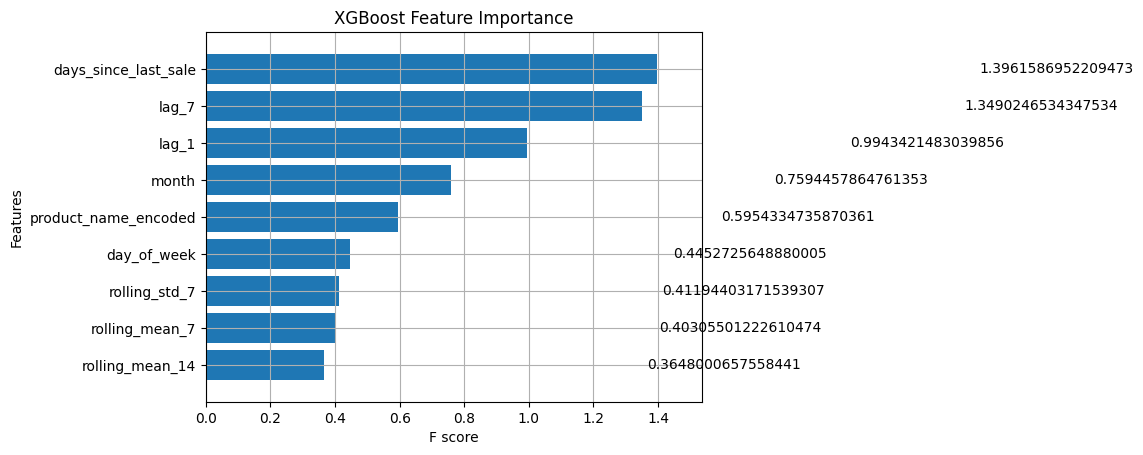

In [58]:
xgb.plot_importance(model_xgb, max_num_features=10, importance_type='gain', height=0.8)
plt.title('XGBoost Feature Importance')
plt.show()

In [61]:
max_date = df['date'].max()

train_df = df[df['date'] < (max_date - pd.Timedelta(days=30))].copy()
test_df = df[df['date'] >= (max_date - pd.Timedelta(days=30))].copy()

dtrain = xgb.DMatrix(train_df[FEATURES], label=train_df['log_quantity_sold'])
dtest = xgb.DMatrix(test_df[FEATURES], label=test_df['log_quantity_sold'])

model_xgb = xgb.Booster()
model_xgb.load_model('/content/drive/MyDrive/Mina /Data Science Technical Assessment/Models/XGBoost/xgb_model_tuned.json')

test_df['pred_log_quantity_sold'] = model_xgb.predict(dtest)

test_df['quantity_sold'] = np.expm1(test_df['log_quantity_sold'])
test_df['predicted_quantity_sold'] = np.expm1(test_df['pred_log_quantity_sold'])

product_metrics = []

for product in test_df['product_name'].unique():
    temp_df = test_df[test_df['product_name'] == product]

    true = temp_df['quantity_sold']
    pred = temp_df['predicted_quantity_sold']

    mape = mean_absolute_percentage_error(true, pred)
    wmape = np.sum(np.abs(true - pred)) / np.sum(np.abs(true))

    product_metrics.append({
        'product_name': product,
        'MAPE': mape,
        'WMAPE': wmape
    })

product_metrics_df = pd.DataFrame(product_metrics).sort_values('MAPE')

product_metrics_df.head(10)


,product_name,MAPE,WMAPE
1039,iylumet (50/850)(60tab),0.045964,0.045964
1002,spandex crepe bandage 5*4.5,0.051870,0.051870
967,sun naturals ginseng (100 tablets ),0.056706,0.056706
1037,imigran 50mg 2tab,0.062959,0.062959
947,tera d3 (50000 mg )(12cap),0.064264,0.064264
663,s-26 (3) 900g,0.067463,0.067463
1079,biodal (1000 iu)(100tab),0.070431,0.070431
1117,picoprep powder (2 sachets),0.070697,0.070697
1003,suprax 200 caps,0.071909,0.071909
812,accu chek performa strips,0.072568,0.072568


In [63]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

mape_xgb = mean_absolute_percentage_error(test_df['quantity_sold'], test_df['predicted_quantity_sold'])
rmse_xgb = np.sqrt(mean_squared_error(test_df['quantity_sold'], test_df['predicted_quantity_sold']))
wmape_xgb = np.sum(np.abs(test_df['quantity_sold'] - test_df['predicted_quantity_sold'])) / np.sum(np.abs(test_df['quantity_sold']))

print(f"Final Test Set Metrics:")
print(f"XGBoost: MAPE={mape_xgb:.4f}, RMSE={rmse_xgb:.4f}, WMAPE={wmape_xgb:.4f}")


Final Test Set Metrics:
XGBoost: MAPE=0.3084, RMSE=0.9746, WMAPE=0.3632


In [66]:
top_products_actual = (
    test_df.groupby('product_name')['quantity_sold']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
    .tolist()
)

print("Top 5 products with actuals:", top_products_actual)

Top 5 products with actuals: ['panadol advance (24tab)', 'revanin  (500mg) (30 tab)', 'amoclan forte 625mg tab', 'pelargos (syrup)  (120ml)', 'eazit d.s (10 caps)']


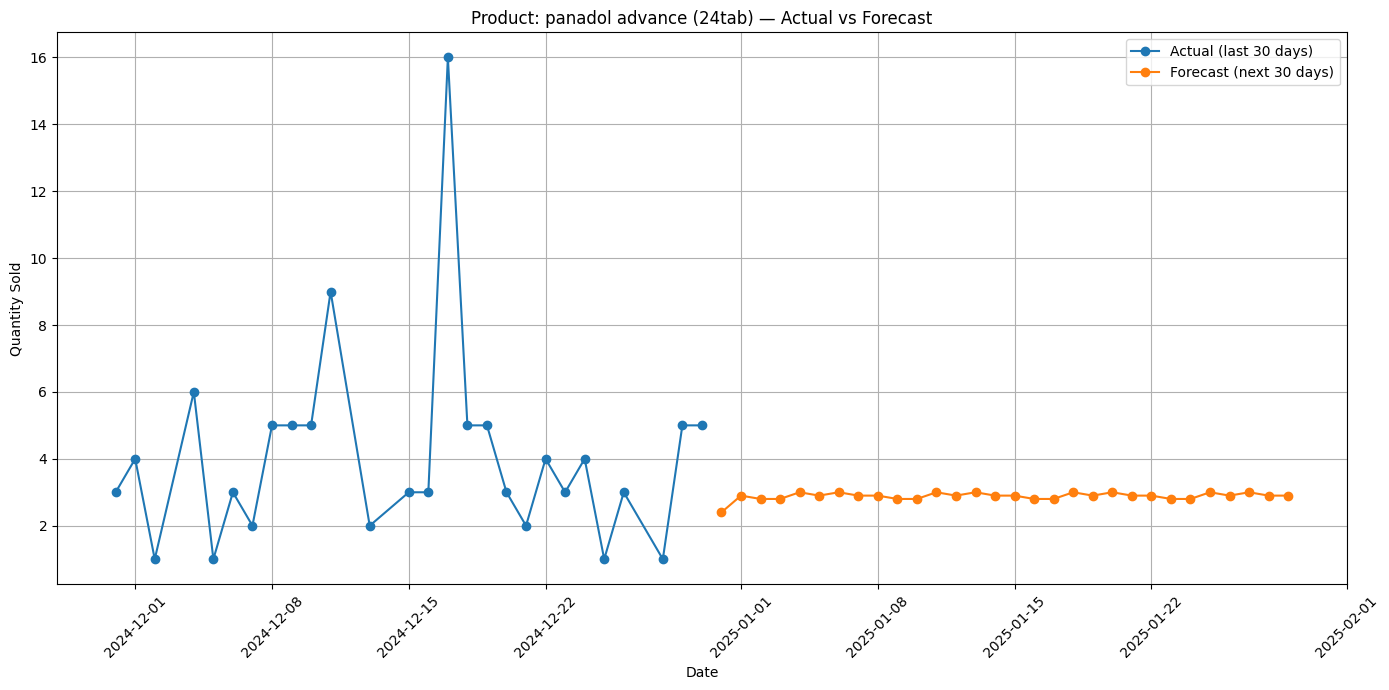

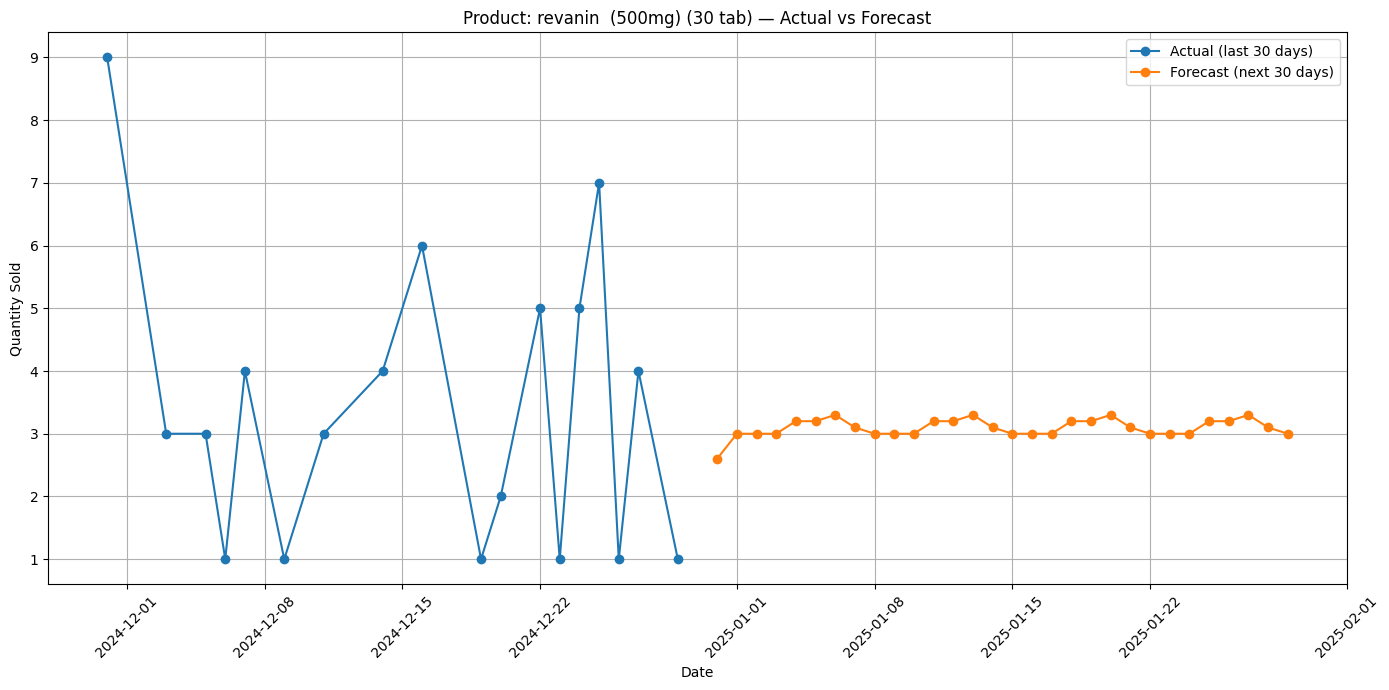

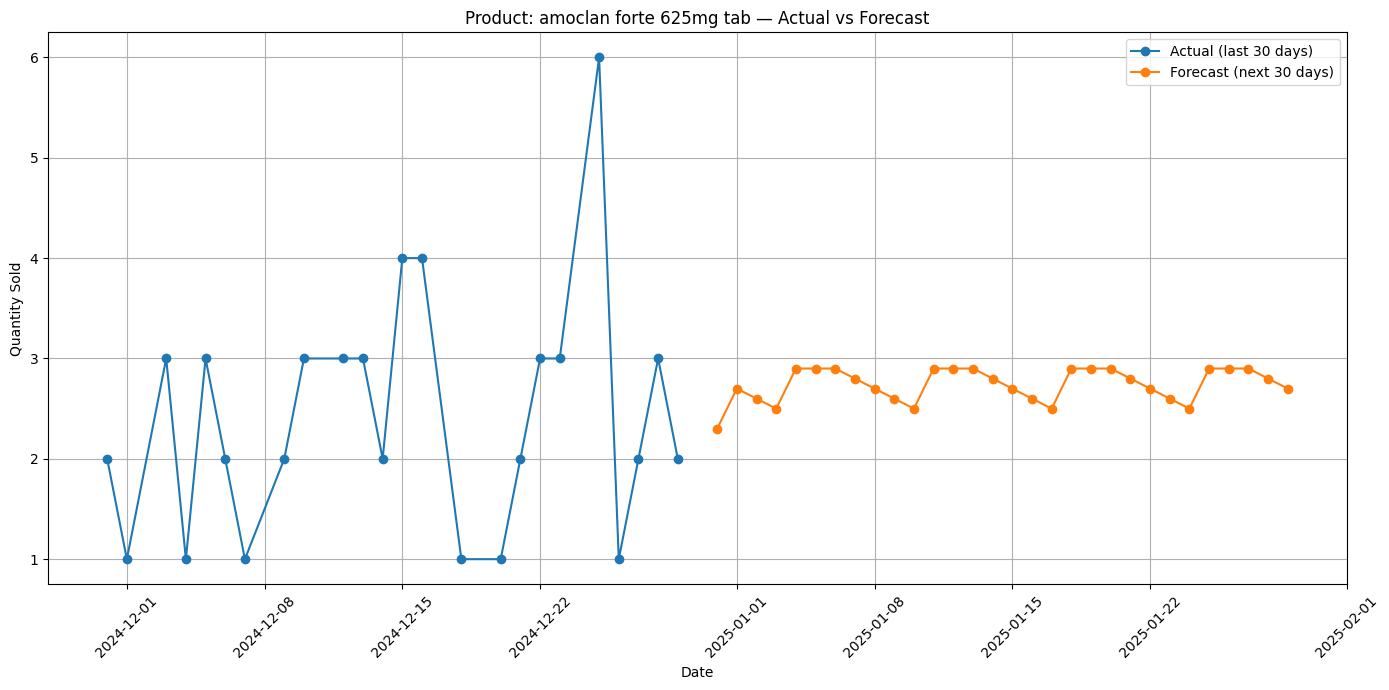

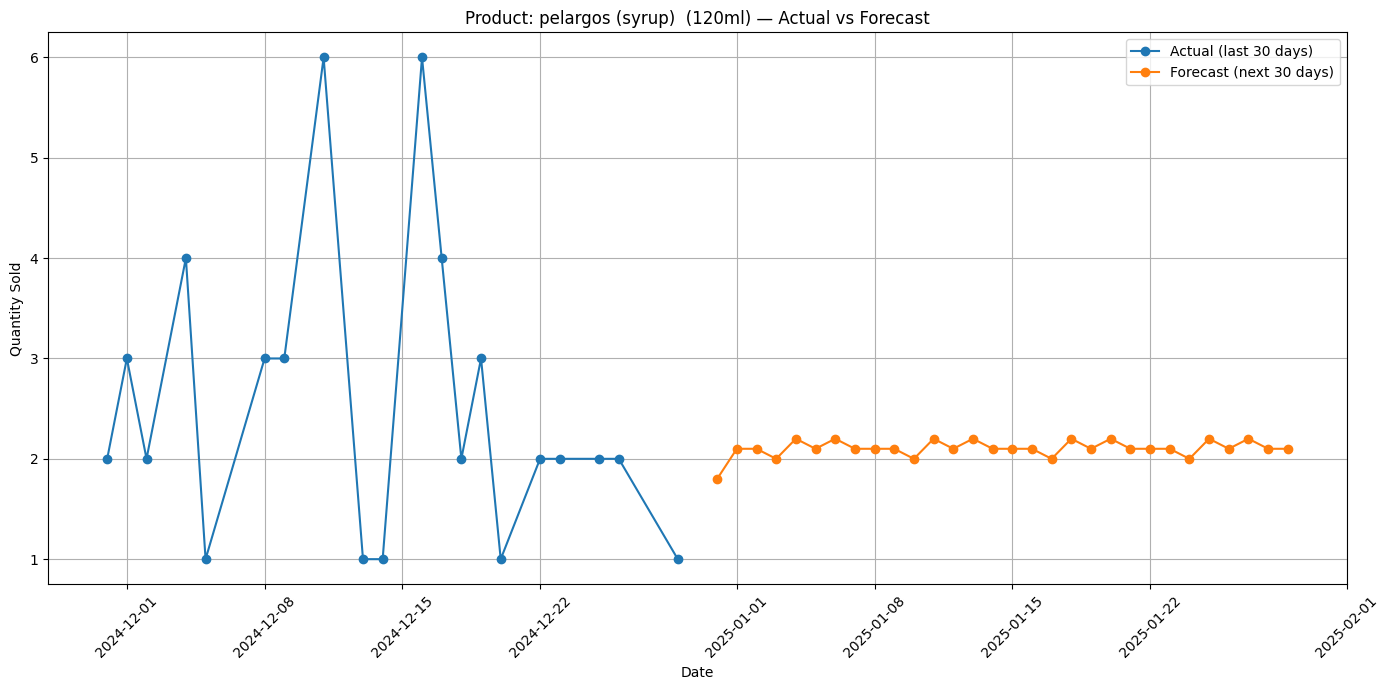

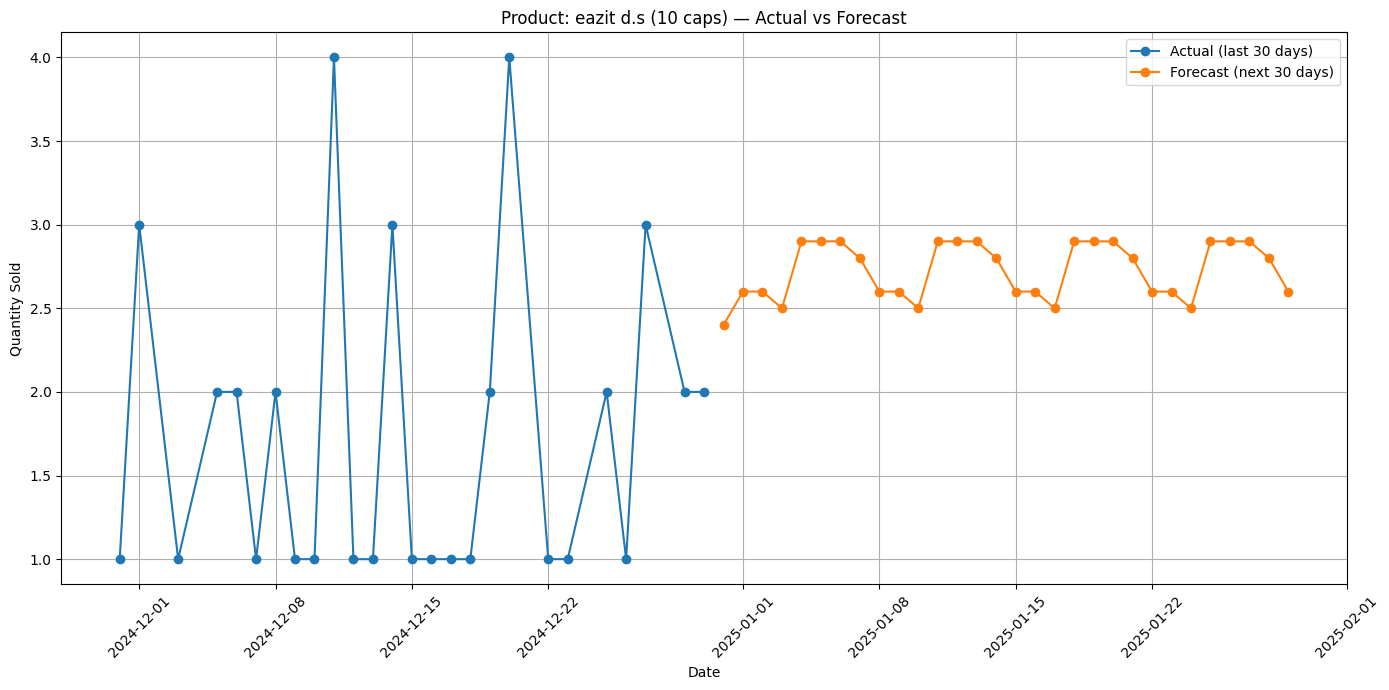

In [67]:
for product in top_products_actual:
    actual_product_df = test_df[test_df['product_name'] == product].copy()
    forecast_product_df = final_forecast[final_forecast['product_name'] == product].copy()

    plt.figure(figsize=(14, 7))
    plt.plot(actual_product_df['date'], actual_product_df['quantity_sold'], marker='o', label='Actual (last 30 days)')
    plt.plot(forecast_product_df['date'], forecast_product_df['predicted_quantity_sold'], marker='o', label='Forecast (next 30 days)')

    plt.title(f"Product: {product} — Actual vs Forecast")
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


# **Task 2**

# **Install base packages**

In [2]:
!pip install sentence-transformers faiss-cpu
!pip install google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [21]:
!pip install cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.9 MB/s eta 0:00:00


# **Imports + API keys**

In [36]:
import pandas as pd
import numpy as np
import re
import faiss
from sentence_transformers import SentenceTransformer
import cohere
import json

co = cohere.Client("pxW2ClHgYsDLKQ3ZxYf1Dp8zl3RuPSxBklOZP00v")

# **Read the Data**

In [38]:
df = pd.read_excel("/content/drive/MyDrive/Mina /Data Science Technical Assessment/Q2 alias_products.xlsx")
print(df.columns)

reference_texts = [row.arabic_name for row in df.itertuples()]
reference_meta = [
    {
        "product_id": row.product_id,
        "alias": row.alias,
        "arabic_name": row.arabic_name,
        "english_name": row.english_name
    }
    for row in df.itertuples()
]

print(f"Loaded {len(reference_texts)} products.")


Index(['alias', 'product_id', 'arabic_name', 'english_name'], dtype='object')
Loaded 772 products.


In [39]:
df

,alias,product_id,arabic_name,english_name
0,XARELTO 20 MG 28 TAB,189441,زاريلتو 20مجم 28 اقراص,Xarelto 20mg 28 Tablet
1,EXFORGE 5/160 MG 14 TAB NEW PRICE 122 LE,186716,اكسفورج 160/5مجم 14 اقراص,Exforge 5mg/160mg 14 Tablet
2,ROACCUTANE 20MG CAP,190650,رواكيوتان 20 مجم 30 كبسول,ROACCUTANE 20 MG 30 CAP
3,LUSTRAL 50MG 20TAB,187628,لوسترال 50مجم 20 اقراص,Lustral 50mg 20 Tablet
4,OSSOFORTIN 5000 MG 30 TAB NEW PRICE,209820,اوسوفورتين اوريجينال 5000وحدة 30 اقراص,Ossofortin Original 5.000iu 30 Tablet
...,...,...,...,...
767,كالدين زنك معلق 120مل,185813,كالدين زنك شراب معلق 120مل,Caldin Zinc Suspension 120ml
768,روزاليا سيرم شعر 120مل,190653,روزاليا سيرم للشعر 120 مل,ROZALIA HAIR SERUM 120 ML
769,نيوكاربون 30كبسوله س ج مارينيز,217154,مارنيز نيوكاربون 30 كبسولة.,MARNYS NEOCARBON 30 CAPS.
770,نيوكاربون 30كبسوله مارينيز,217154,مارنيز نيوكاربون 30 كبسولة.,MARNYS NEOCARBON 30 CAPS.


# **Normalize and Clean Arabic_text**

In [40]:
def normalize_arabic(text):
    text = text.lower()
    ARABIC_NORMALIZATION_MAP = {
        "ة": "ه", "أ": "ا", "إ": "ا", "آ": "ا", "ى": "ي", "ئ": "ي", "ؤ": "و"
    }
    for k, v in ARABIC_NORMALIZATION_MAP.items():
        text = text.replace(k, v)
    arabic_to_english_digits = str.maketrans("٠١٢٣٤٥٦٧٨٩", "0123456789")
    text = text.translate(arabic_to_english_digits)
    text = text.replace("م ج", "مجم").replace("mg", "مجم").replace(" مجم", "مجم").replace("ملغ", "مجم")
    text = text.replace("اقراص", "قرص").replace("كبسولات", "كبسوله").replace("كبسول", "كبسوله")
    text = re.sub(r"[ًٌٍَُِّْـ]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

STOP_WORDS = ["س ق", "عرض", "جديد", "عدد", "علبه", "مجانا"]

def clean_text(text):
    text = normalize_arabic(str(text))
    for stop in STOP_WORDS:
        text = text.replace(stop, "")
    text = re.sub(r"\s+", " ", text).strip()
    return text

# **NER extraction**

In [41]:
def extract_entities(text):
    brand_match = re.match(r"([^\d]+)", text)
    brand = brand_match.group(1).strip() if brand_match else ""

    dosage_match = re.search(r"(\d+\s?(?:مجم|جم|mg))", text)
    dosage = dosage_match.group(1).strip() if dosage_match else ""

    form_match = re.search(r"(قرص|كبسوله|امبول|شراب)", text)
    form = form_match.group(1).strip() if form_match else ""

    quantity_match = re.search(r"(\d+\s?(?:قرص|كبسوله|علبه|شريط))", text)
    quantity = quantity_match.group(1).strip() if quantity_match else ""

    return {
        "brand": brand,
        "dosage": dosage,
        "form": form,
        "quantity": quantity
    }

# **Filter reference products**

In [47]:
def filter_reference_products(ner_entities, reference_meta):
    filtered_meta = []
    for meta in reference_meta:
        text_lower = normalize_arabic(meta["arabic_name"])
        brand_ok = (normalize_arabic(ner_entities['brand']) in text_lower) if ner_entities['brand'] else False
        dosage_ok = (normalize_arabic(ner_entities['dosage']) in text_lower) if ner_entities['dosage'] else False
        form_ok = (normalize_arabic(ner_entities['form']) in text_lower) if ner_entities['form'] else False

        match_score = 0
        if brand_ok:
            match_score += 1
        if dosage_ok:
            match_score += 1
        if form_ok:
            match_score += 1

        if match_score >= 1:
            filtered_meta.append(meta)

    return filtered_meta

# **Sentence Transformer and FAISS build**

In [48]:
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

def build_filtered_faiss(filtered_meta):
    filtered_texts = [meta["arabic_name"] for meta in filtered_meta]
    filtered_embeddings = model.encode([clean_text(t) for t in filtered_texts]).astype('float32')
    dimension = filtered_embeddings.shape[1]
    index_filtered = faiss.IndexFlatL2(dimension)
    index_filtered.add(filtered_embeddings)
    return index_filtered, filtered_texts

# **Cohere reranker**

In [70]:
def rerank_with_cohere_chat_reranker(input_text, candidates):
    if len(candidates) == 0:
        return {
            "best_match_text": "",
            "match_score": 0.0
        }


    prompt = f"""
You are an expert Arabic pharmaceutical product matcher.

Given an INPUT TEXT and a list of CANDIDATE PRODUCTS:

Rules:
 Brand must match exactly if present
 Dosage & Quantity should match
 Form should match
 Allow fuzzy match for spelling errors
 If no good match, set match_score = 0.0

Return ONLY JSON:

{{
  "best_match": "<product name>",
  "match_score": <score between 0 and 1>
}}

Now process this:

Input: "{input_text}"
Candidates:
{chr(10).join([f"- {cand}" for cand in candidates])}

Your response (ONLY JSON):
"""

    response = co.chat(
        model="command-r-plus",
        message=prompt,
        temperature=0
    )

    output = response.text


    try:
        result_json = json.loads(output)
        return {
            "best_match_text": result_json.get("best_match", ""),
            "match_score": result_json.get("match_score", 0.0)
        }
    except Exception as e:
        print(f"Parse error: {e}")
        print("LLM output:", output)
        return {
            "best_match_text": "",
            "match_score": 0.0
        }

In [71]:
def match_product(input_text, top_k=10):
    input_clean = clean_text(input_text)
    ner = extract_entities(input_clean)


    filtered_meta = filter_reference_products(ner, reference_meta)
    print(f"Filtered candidates: {len(filtered_meta)}")

    if len(filtered_meta) == 0:
        return {
            "input": input_text,
            "best_match": None,
            "match_score": 0.0
        }


    index_filtered, filtered_texts = build_filtered_faiss(filtered_meta)


    query_embedding = model.encode([input_clean]).astype('float32')
    D, I = index_filtered.search(query_embedding, top_k)

    candidates = [filtered_texts[idx] for idx in I[0]]


    rerank_result = rerank_with_cohere_chat_reranker(input_text, candidates)


    best_meta = next((meta for meta in filtered_meta if normalize_arabic(meta["arabic_name"]) == normalize_arabic(rerank_result["best_match_text"])), None)

    return {
        "input": input_text,
        "best_match": best_meta,
        "match_score": rerank_result['match_score']
    }

# **Test**

In [72]:
example_input1 = "اوكسالبتال 300مج 30 قرص س ق"
result1 = match_product(example_input1)
print(result1)

example_input2 = "فاردينوريكت 20 مجم 8 اقراص"
result2 = match_product(example_input2)
print(result2)

example_input3 = "اكسفورج 5/160مجم 14 قرص"
result3 = match_product(example_input3)
print(result3)

Filtered candidates: 328
{'input': 'اوكسالبتال 300مج 30 قرص س ق', 'best_match': {'product_id': 188239, 'alias': 'اوكساليبتال 300مجم 30 قرص س ق', 'arabic_name': 'اوكساليبتال 300مجم 30 اقراص', 'english_name': 'Oxaleptal 300mg 30 Tablet'}, 'match_score': 0.95}
Filtered candidates: 340
{'input': 'فاردينوريكت 20 مجم 8 اقراص', 'best_match': {'product_id': 190776, 'alias': 'فارديروز 20 مجم فياجرا', 'arabic_name': 'فارديروز 20مجم 12 اقراص', 'english_name': 'Vardirose 20mg 12 Tablet'}, 'match_score': 0.85}
Filtered candidates: 328
{'input': 'اكسفورج 5/160مجم 14 قرص', 'best_match': {'product_id': 186716, 'alias': 'EXFORGE 5/160 MG 14 TAB NEW PRICE 122 LE', 'arabic_name': 'اكسفورج 160/5مجم 14 اقراص', 'english_name': 'Exforge 5mg/160mg 14 Tablet'}, 'match_score': 0.98}
